In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import yfinance as yf
from IPython.utils.io import capture_output

from sklearn.preprocessing import RobustScaler

In [720]:
def delete_columns_from_csv(file_path, columns_to_delete, output_file_path=None):
   
    df = pd.read_csv(file_path)
    
    
    df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
    
    
    if output_file_path:
        df.to_csv(output_file_path, index=False)
    
    return df


In [721]:
### Profile 
file_path_Profile = "company_profiles.csv"
columns_to_delete_Profile = ['description', 'mic_code','website','type','CEO','address','city','phone']
output_file_path_profile = 'FinalProjetProfile.csv'
### Income
file_path_Income = "income_statements.csv"
columns_to_delete_Income = ['pretax_income', 'income_tax','ebit']
output_file_path_Income = 'FinalProjetIncome.csv'

### cash flow 
file_path_Cash_Flow = "cash_flow_data.csv"
columns_to_delete_Cash_Flow = [ 'operating_activities.net_income','operating_activities.depreciation','operating_activities.deferred_taxes','operating_activities.stock_based_compensation','operating_activities.other_non_cash_items','operating_activities.accounts_receivable','operating_activities.accounts_payable','operating_activities.other_assets_liabilities','investing_activities.capital_expenditures','investing_activities.net_intangibles','investing_activities.net_acquisitions','investing_activities.purchase_of_investments','investing_activities.sale_of_investments','investing_activities.other_investing_activity','financing_activities.long_term_debt_issuance','financing_activities.long_term_debt_payments','financing_activities.short_term_debt_issuance','financing_activities.common_stock_issuance','financing_activities.common_stock_repurchase','financing_activities.common_dividends','financing_activities.other_financing_charges','exchange_timezone','period']
output_file_path_Cash_Flow = 'FinalProjet_CashFlow.csv'

### modified csv all 

modified_df_Profile = delete_columns_from_csv(file_path_Profile, columns_to_delete_Profile, output_file_path_profile)
modified_df_Income = delete_columns_from_csv(file_path_Income, columns_to_delete_Income, output_file_path_Income)
modified_df_CashFlow = delete_columns_from_csv(file_path_Cash_Flow, columns_to_delete_Cash_Flow, output_file_path_Cash_Flow)


In [722]:
modified_df_Profile.columns

Index(['symbol', 'name', 'exchange', 'sector', 'industry', 'employees', 'zip',
       'state', 'country'],
      dtype='object')

balance_sheet_data - modify to be a table and not array with array as string in csv

In [723]:
from pandas import json_normalize
import ast

df = pd.read_csv("balance_sheet_data.csv")


def convert_if_string(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x

def recursive_flatten_columns(df, prefix=''):
    for column in df.columns:

        df[column] = df[column].apply(convert_if_string)
        
        if isinstance(df[column].iloc[0], dict):
            # Flatten dictionaries directly into the DataFrame
            temp_df = json_normalize(df[column])
            temp_df.columns = [f"{prefix}{column}.{subcol}" for subcol in temp_df.columns]
            df = df.drop(column, axis=1).join(temp_df)
        elif isinstance(df[column].iloc[0], list):

            pass  
    return df

df_flattened = recursive_flatten_columns(df)


In [724]:
columns_to_keep = [
    "fiscal_date", 
    "symbol", 
    "assets.total_assets", 
    "assets.current_assets.total_current_assets", 
    "assets.non_current_assets.total_non_current_assets", 
    "liabilities.total_liabilities", 
    "liabilities.current_liabilities.short_term_debt", 
    "liabilities.current_liabilities.total_current_liabilities", 
    "liabilities.non_current_liabilities.long_term_debt", 
    "liabilities.non_current_liabilities.total_non_current_liabilities", 
    "shareholders_equity.common_stock", 
    "shareholders_equity.retained_earnings", 
    "shareholders_equity.other_shareholders_equity", 
    "shareholders_equity.total_shareholders_equity", 
    "shareholders_equity.additional_paid_in_capital", 
    "shareholders_equity.treasury_stock", 
    "shareholders_equity.minority_interest"
]

df_filtered = df_flattened[columns_to_keep]

print(df_filtered.head())


  fiscal_date symbol  assets.total_assets  \
0  2023-06-30   MSFT         4.119760e+11   
1  2022-06-30   MSFT         3.648400e+11   
2  2021-06-30   MSFT         3.337790e+11   
3  2020-06-30   MSFT         3.013110e+11   
4  2019-06-30   MSFT         2.865560e+11   

   assets.current_assets.total_current_assets  \
0                                1.842570e+11   
1                                1.696840e+11   
2                                1.844060e+11   
3                                1.819150e+11   
4                                1.755520e+11   

   assets.non_current_assets.total_non_current_assets  \
0                                       2.277190e+11    
1                                       1.951560e+11    
2                                       1.493730e+11    
3                                       1.193960e+11    
4                                       1.110040e+11    

   liabilities.total_liabilities  \
0                   2.057530e+11   
1                  

In [725]:
rename_columns = {
    "fiscal_date": "fiscal_date",
    "symbol": "symbol",
    "assets.total_assets": "total_assets",
    "assets.current_assets.total_current_assets": "total_current_assets",
    "assets.non_current_assets.total_non_current_assets": "total_non_current_assets",
    "liabilities.total_liabilities": "total_liabilities",
    "liabilities.current_liabilities.short_term_debt": "short_term_debt",
    "liabilities.current_liabilities.total_current_liabilities": "total_current_liabilities",
    "liabilities.non_current_liabilities.long_term_debt": "long_term_debt",
    "liabilities.non_current_liabilities.total_non_current_liabilities": "total_non_current_liabilities"
}


df_filtered = df_filtered.rename(columns=rename_columns)


print(df_filtered.head())

  fiscal_date symbol  total_assets  total_current_assets  \
0  2023-06-30   MSFT  4.119760e+11          1.842570e+11   
1  2022-06-30   MSFT  3.648400e+11          1.696840e+11   
2  2021-06-30   MSFT  3.337790e+11          1.844060e+11   
3  2020-06-30   MSFT  3.013110e+11          1.819150e+11   
4  2019-06-30   MSFT  2.865560e+11          1.755520e+11   

   total_non_current_assets  total_liabilities  short_term_debt  \
0              2.277190e+11       2.057530e+11     5.247000e+09   
1              1.951560e+11       1.982980e+11     2.749000e+09   
2              1.493730e+11       1.917910e+11     8.072000e+09   
3              1.193960e+11       1.830070e+11     3.749000e+09   
4              1.110040e+11       1.669680e+11     5.516000e+09   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   

In [726]:
df_filtered.to_csv('flat_balance_sheet_data.csv', index=False)


In [727]:
modified_df_CashFlow.head() 	

fiscal_date  end_cash_position  income_tax_paid  interest_paid  \
0  2020-06-30        13576000000              NaN            NaN   
1  2021-06-30        14224000000              NaN            NaN   
2  2022-06-30        13931000000              NaN            NaN   
3  2023-06-30        34704000000              NaN            NaN   
4  2020-09-30        39789000000     9.501000e+09   3.002000e+09   

   free_cash_flow  operating_activities.operating_cash_flow  \
0    4.523400e+10                              6.089400e+10   
1    5.611800e+10                              7.798900e+10   
2    6.514900e+10                              8.944400e+10   
3    5.947500e+10                              8.738600e+10   
4    7.336500e+10                              8.067400e+10   

   investing_activities.investing_cash_flow  \
0                             -1.222300e+10   
1                             -2.757700e+10   
2                             -3.031100e+10   
3                             -2.268000e+10   
4                             -4.289000e+09   

   financing_activities.financing_cash_flow symbol            name currency  \
0                             -4.603100e+10   MSFT  Microsoft Corp      USD   
1                             -4.848600e+10   MSFT  Microsoft Corp      USD   
2                             -5.887600e+10   MSFT  Microsoft Corp      USD   
3                             -4.393500e+10   MSFT  Microsoft Corp      USD   
4                             -8.594000e+10   AAPL       Apple Inc      USD   

  exchange mic_code  
0   NASDAQ     XNGS  
1   NASDAQ     XNGS  
2   NASDAQ     XNGS  
3   NASDAQ     XNGS  
4   NASDAQ     XNGS

In [728]:
modified_df_Income.head()

fiscal_date         sales  cost_of_goods  gross_profit  operating_income  \
0  30/06/2023  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1  30/06/2022  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2  30/06/2021  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3  30/06/2020  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4  30/09/2023  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...        ebitda  \
0              7.446000e+09  ...  1.051550e+11   
1              7.496000e+09  ...  9.990500e+10   
2              7.547000e+09  ...  8.383100e+10   
3              7.610000e+09  ...  6.839500e+10   
4              1.574423e+10  ...  1.291880e+11   

   net_income_continuous_operations  minority_interests  \
0                      7.236100e+10                 NaN   
1                      7.273800e+10                 NaN   
2                      6.127100e+10                 NaN   
3                      4.428100e+10                 NaN   
4                      9.699500e+10                 NaN   

   preferred_stock_dividends  research_and_development  \
0                        NaN              2.719500e+10   
1                        NaN              2.451200e+10   
2                        NaN              2.071600e+10   
3                        NaN              1.926900e+10   
4                        NaN              2.991500e+10   

   selling_general_and_administrative  other_operating_expenses        income  \
0                        3.033400e+10                       NaN  2.994000e+09   
1                        2.772500e+10                       NaN  2.094000e+09   
2                        2.522400e+10                       NaN  2.131000e+09   
3                        2.470900e+10                       NaN  2.680000e+09   
4                        2.493200e+10                       NaN  3.750000e+09   

        expense  symbol  
0  1.968000e+09    MSFT  
1  2.063000e+09    MSFT  
2  2.346000e+09    MSFT  
3  2.591000e+09    MSFT  
4  3.933000e+09    AAPL  

[5 rows x 21 columns]

now we merge all data in symbol+year, we will create year colunm for each table first

In [729]:
import pandas as pd

def add_year_column(dataframe, date_column='Date', output_column='year', date_format='%d/%m/%Y'):
    """
    Adds a 'year' column to a DataFrame based on a specified 'Date' column.
    
    Parameters:
    - dataframe: pd.DataFrame, the DataFrame to modify.
    - date_column: str, the name of the column containing date information.
    - output_column: str, the name of the new column to be added, containing the extracted year.
    - date_format: str, the format of the dates in the date_column.
    
    Returns:
    - A DataFrame with the new 'year' column added.
    """
    # Ensure the date_column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    
    # Extract the year and create the new column
    dataframe[output_column] = dataframe[date_column].dt.year
    
    return dataframe







In [730]:
modified_df_Income = add_year_column(modified_df_Income, 'fiscal_date', 'year')
modified_df_CashFlow = add_year_column(modified_df_CashFlow,'fiscal_date', 'year','%Y-%m-%d')
modified_balance_sheet = add_year_column(df_filtered, 'fiscal_date', 'year', '%Y-%m-%d')

print(modified_df_Income[['fiscal_date', 'year']].head())
print(modified_df_CashFlow[['fiscal_date', 'year']].head())
print(modified_balance_sheet[['fiscal_date', 'year']].head())

  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2023-09-30  2023
  fiscal_date  year
0  2020-06-30  2020
1  2021-06-30  2021
2  2022-06-30  2022
3  2023-06-30  2023
4  2020-09-30  2020
  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2019-06-30  2019


Merge

In [731]:
print(len(modified_df_Income))
print(len(modified_df_CashFlow))
print(len(modified_balance_sheet))

5478
5439
8087


In [732]:
# Check for duplicates based on 'year' and 'symbol'
print(modified_df_Income.duplicated(subset=['year', 'symbol']).sum())
print(modified_df_CashFlow.duplicated(subset=['year', 'symbol']).sum())
print(modified_balance_sheet.duplicated(subset=['year', 'symbol']).sum())


12
6
99


drop duplicates

In [733]:

modified_df_Income = modified_df_Income.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_df_CashFlow = modified_df_CashFlow.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_balance_sheet = modified_balance_sheet.drop_duplicates(subset=['year', 'symbol'], keep=False)

print( len(modified_df_Income))
print(len(modified_df_CashFlow))
print( len(modified_balance_sheet))


5454
5427
7890


In [734]:
merged_df_2 = pd.merge(modified_df_Income, modified_df_CashFlow, on=['year', 'symbol'], how='inner')


final_merged_df = pd.merge(merged_df_2, modified_balance_sheet, on=['year', 'symbol'], how='inner')

print(len(final_merged_df))
print(final_merged_df.head())

5365
  fiscal_date_x         sales  cost_of_goods  gross_profit  operating_income  \
0    2023-06-30  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1    2022-06-30  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2    2021-06-30  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3    2020-06-30  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4    2023-09-30  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...  total_current_liabilities  long_term_debt  \
0              7.446000e+09  ...            

In [735]:
final_merged_df.to_csv('final_merged_df', index=False)
final_merged_df.columns


Index(['fiscal_date_x', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 'symbol', 'year', 'fiscal_date_y',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow', 'name', 'currency',
       'exchange', 'mic_code', 'fiscal_date', 'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabi

missing values


In [736]:
# we drop all data without net income. after earching the data for the rest, we safely fillna(0).
final_merged_df = final_merged_df.dropna(subset=[ 'net_income'])
final_merged_df = final_merged_df.fillna(0)


print(f"Number of rows after dropping NaNs in 'net_income': {final_merged_df.shape[0]}")

Number of rows after dropping NaNs in 'net_income': 5363


Next, we want only stocks with 3 years of data and more

In [737]:
ticker_counts = final_merged_df['symbol'].value_counts()

tickers_with_3_or_more_years = ticker_counts[ticker_counts >= 3]
print(f"Number of companies with data for 3 or more years: {len(tickers_with_3_or_more_years)}")

Number of companies with data for 3 or more years: 1439


In [738]:
tickers_to_keep = tickers_with_3_or_more_years.index.tolist()

In [739]:
final_merged_df = final_merged_df[final_merged_df['symbol'].isin(tickers_to_keep)]


print(f"Number of rows after filtering: {final_merged_df.shape[0]}")

Number of rows after filtering: 5088


In [740]:
distinct_tickers_count = final_merged_df['symbol'].nunique()
distinct_tickers_count

1439

In [741]:
final_merged_df = final_merged_df[[ 'year', 'symbol','fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

In [742]:
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   
2               8.865700e+10    5.970300e+10                   1.031340e+11   
3               7.231000e+10    6.724900e+10                   1.106970e+11   
4               1.453080e+11    9.528100e+10                   1.451290e+11   

   shareholders_equity.common_stock  shareholders_equity.retained_earnings  \
0                      9.371800e+10                           1.188480e+11   
1                      8.693900e+10                           8.428100e+10   
2                      8.311100e+10                           5.705500e+10   
3                      8.055200e+10                           3.456600e+10   
4                      7.381200e+10                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  
0                                 0.0                                    0.0  
1                                 0.0                                    0.0  
2                                 0.0                                    0.0  
3                                 0.0                                    0.0  
4                                 0.0                                    0.0  

[5 rows x 46 columns]

In [743]:
corrdf = final_merged_df[['fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

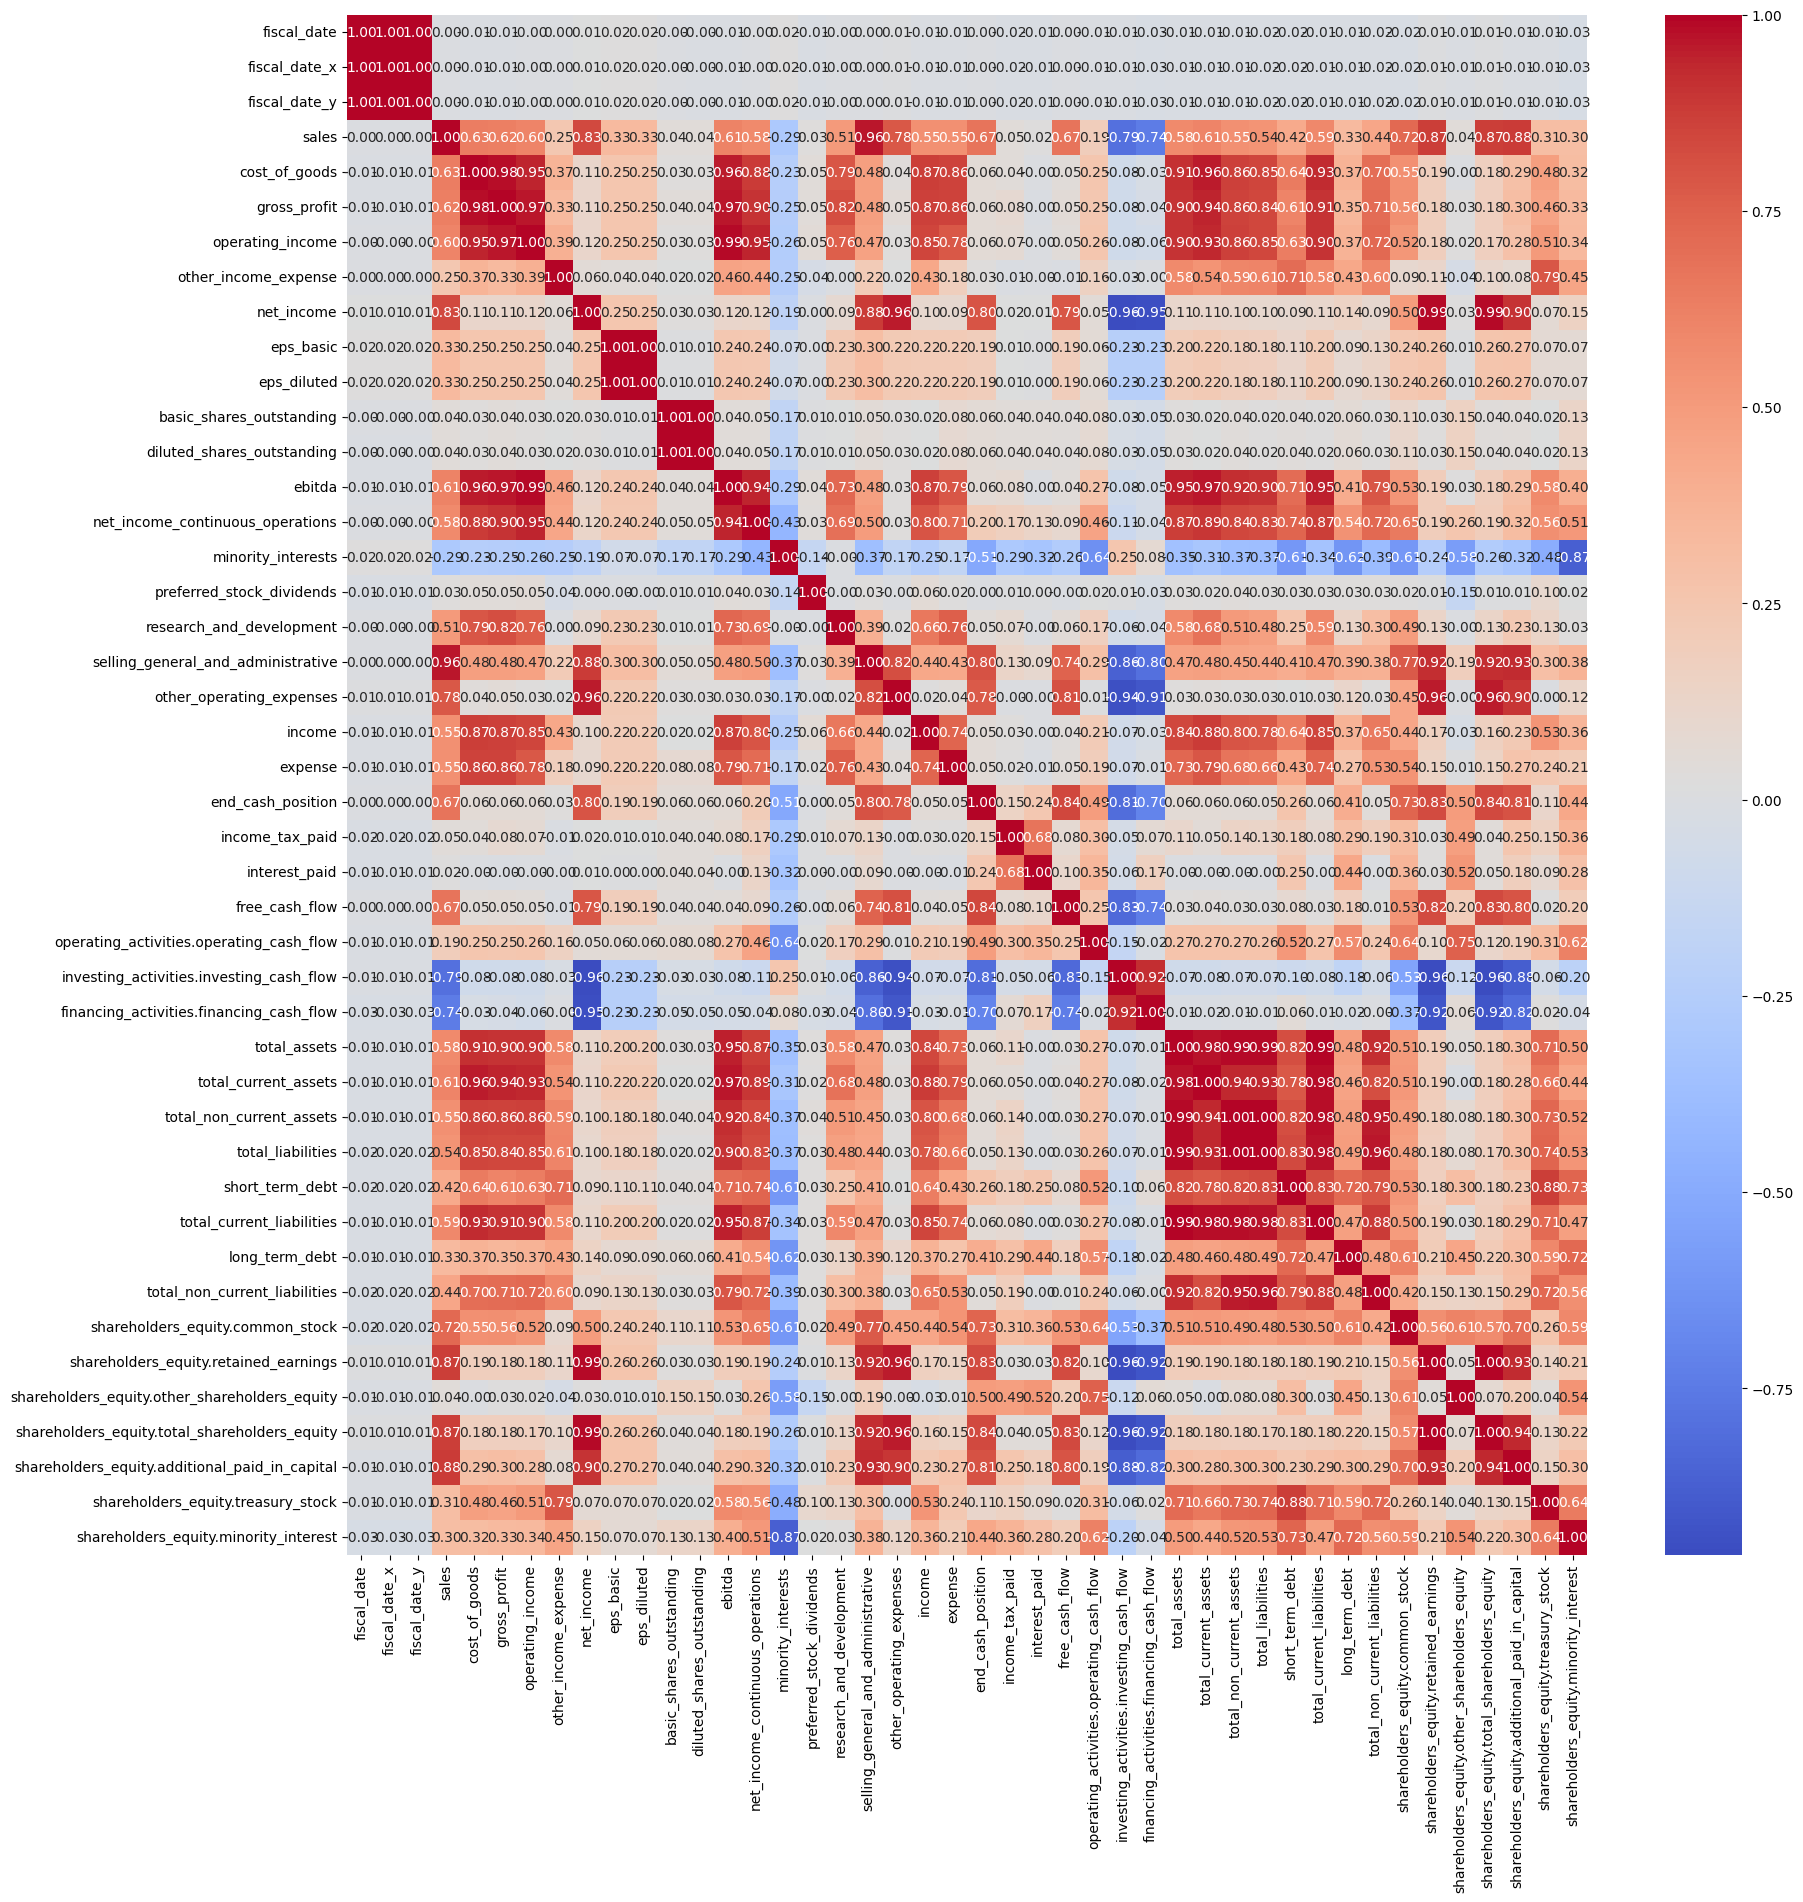

In [744]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = corrdf.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Indicator Functions

In [745]:
def calculate_debt_to_equity_ratio(df):

    numerator = df['long_term_debt'] + df['short_term_debt']

    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])


    df['Debt to Equity Ratio'] = np.divide(numerator, denominator)


    df['Debt to Equity Ratio'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Debt to Equity Ratio'].fillna(0, inplace=True)

    return df


def calculate_Profit_Margin(df):

    numerator = df['net_income'] 


    denominator = np.where((df['sales']) == 0,
                           np.nan,
                           df['sales'] )


    df['Profit Margin'] = np.divide(numerator, denominator)


    df['Profit Margin'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Profit Margin'].fillna(0, inplace=True)

    return df


def calculate_Return_On_Equity(df):

    numerator = df['net_income'] 


    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])



    df['Return On Equity'] = np.divide(numerator, denominator)


    df['Return On Equity'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Equity'].fillna(0, inplace=True)

    return df




def calculate_Return_On_Assets(df):

    numerator = df['net_income'] 


    denominator = np.where((df['total_assets']) == 0,
                           np.nan,
                           df['total_assets'] )


    df['Return On Assets'] = np.divide(numerator, denominator)


    df['Return On Assets'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Assets'].fillna(0, inplace=True)

    return df

In [746]:
final_merged_df=calculate_debt_to_equity_ratio(final_merged_df)
final_merged_df=calculate_Profit_Margin(final_merged_df)
final_merged_df=calculate_Return_On_Equity(final_merged_df)
final_merged_df=calculate_Return_On_Assets(final_merged_df)



final_merged_df.head()


year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   shareholders_equity.retained_earnings  \
0                           1.188480e+11   
1                           8.428100e+10   
2                           5.705500e+10   
3                           3.456600e+10   
4                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   Debt to Equity Ratio  Profit Margin  Return On Equity  Return On Assets  
0              0.290777       0.341462          0.350887          0.175644  
1              0.367895       0.366863          0.436755          0.199370  
2              0.477329       0.364517          0.431522          0.183568  
3              0.600132       0.309625          0.374298          0.146961  
4              1.787533       0.253062          1.560760          0.275098  

[5 rows x 50 columns]

### market capitalization indicator: (stock price * shares outstanding). we will take the yearly close from yfinance API, for the last 4 years for each symbol we have.
also we want the difference in the years

In [747]:
import yfinance as yf

def get_marketcap_data_csv():
    symbols_list = final_merged_df['symbol'].unique().tolist()

    eoy_prices_df = pd.DataFrame()

    symbols_no_data = []

    for symbol in symbols_list:
        try:
            data = yf.download(symbol, start="2019-12-31", end="2023-12-31")
            eoy_data = data['Close'].resample('Y').last()
            eoy_data = eoy_data.reset_index()
            eoy_data['Symbol'] = symbol
            eoy_prices_df = pd.concat([eoy_prices_df, eoy_data[['Date', 'Symbol', 'Close']]])
        except :
            symbols_no_data.append(symbol)

    eoy_prices_df.columns = ['year', 'symbol', 'close']

    print(f"Symbols with no data: {symbols_no_data}")
    print(f"Number of symbols with no data: {len(symbols_no_data)}")

    eoy_prices_df['year'] = eoy_prices_df['year'].dt.year

    eoy_prices_df.to_csv('eoy_prices.csv', index=False)

def make_marketcap_change_column(final_merged_df):
    
    eoy_prices_df = pd.read_csv('eoy_prices.csv')
    final_merged_df = pd.merge(final_merged_df, eoy_prices_df, on=['year', 'symbol'], how='outer') ## we do outer and dropdna to include 2019
    final_merged_df['market cap'] = final_merged_df['diluted_shares_outstanding'] * final_merged_df['close']

    final_merged_df.sort_values(by=['symbol', 'year'], inplace=True)

    # Group by 'symbol' and then use the shift() function to get the previous year's market cap
    final_merged_df['last_year_market_cap'] = final_merged_df.groupby('symbol')['market cap'].shift(1)


    # Calculate the close change percentage for the previous year as a fallback
    close_change_pct = ((final_merged_df['close'] - final_merged_df.groupby('symbol')['close'].shift(1)) / final_merged_df.groupby('symbol')['close'].shift(1))


    # if we dont have market cap change, we will make it from close change percentage
    final_merged_df['market cap change'] = np.where(final_merged_df['last_year_market_cap'].isna(),
                                                np.where(close_change_pct < 300, close_change_pct, 0),
                                                np.where(final_merged_df['last_year_market_cap'] > 0,
                                                         (final_merged_df['market cap'] - final_merged_df['last_year_market_cap']) / final_merged_df['last_year_market_cap'],
                                                         0))

        
    final_merged_df.dropna(subset='net_income',inplace=True)
    final_merged_df.dropna(subset='close',inplace=True) ## this way we remove data we cant make the new indicator for
    return final_merged_df

    


active the following script if you dont have the prices data, or you get error here

In [748]:
### pacient with this function, it will run for around 5 minutes.
#with capture_output() as captured:
#    get_marketcap_data_csv()


In [749]:
final_merged_df = make_marketcap_change_column(final_merged_df)
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
555   2020   AAON  2020-12-31    2020-12-31    2020-12-31  5.145510e+08   
554   2021   AAON  2021-12-31    2021-12-31    2021-12-31  5.345170e+08   
553   2022   AAON  2022-12-31    2022-12-31    2022-12-31  8.887880e+08   
552   2023   AAON  2023-12-31    2023-12-31    2023-12-31  1.168518e+09   
3866  2020    AAP  2020-12-31    2020-12-31    2020-12-31  1.010632e+10   

      cost_of_goods  gross_profit  operating_income  other_income_expense  \
555    3.587020e+08  1.558490e+08        95358000.0             6529000.0   
554    3.966870e+08  1.378300e+08        69232000.0               82000.0   
553    6.512160e+08  2.375720e+08       126749000.0              411000.0   
552    7.694980e+08  3.990200e+08       227481000.0              516000.0   
3866   5.624707e+09  4.481614e+09       749907000.0           -52006000.0   

      ...  shareholders_equity.treasury_stock  \
555   ...                        0.000000e+00   
554   ...                        0.000000e+00   
553   ...                        0.000000e+00   
552   ...                        0.000000e+00   
3866  ...                        1.394080e+09   

      shareholders_equity.minority_interest  Debt to Equity Ratio  \
555                                     0.0              0.000576   
554                                     0.0              0.089195   
553                                     0.0              0.139556   
552                                     0.0              0.068755   
3866                                    0.0              0.856152   

      Profit Margin  Return On Equity  Return On Assets       close  \
555        0.153549          0.225183          0.175963   44.419998   
554        0.109927          0.126044          0.090372   52.953335   
553        0.112936          0.179015          0.123327   50.213333   
552        0.152007          0.241590          0.188672   73.870003   
3866       0.048783          0.138508          0.041642  157.509995   

        market cap  last_year_market_cap  market cap change  
555   3.475999e+09                   NaN           0.348512  
554   4.162466e+09          3.475999e+09           0.197488  
553   3.996102e+09          4.162466e+09          -0.039968  
552   0.000000e+00          3.996102e+09          -1.000000  
3866  1.082850e+10                   NaN          -0.016546  

[5 rows x 54 columns]

In [750]:
left_columns = [ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

corrdf2 = final_merged_df[[ 'year','sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']]




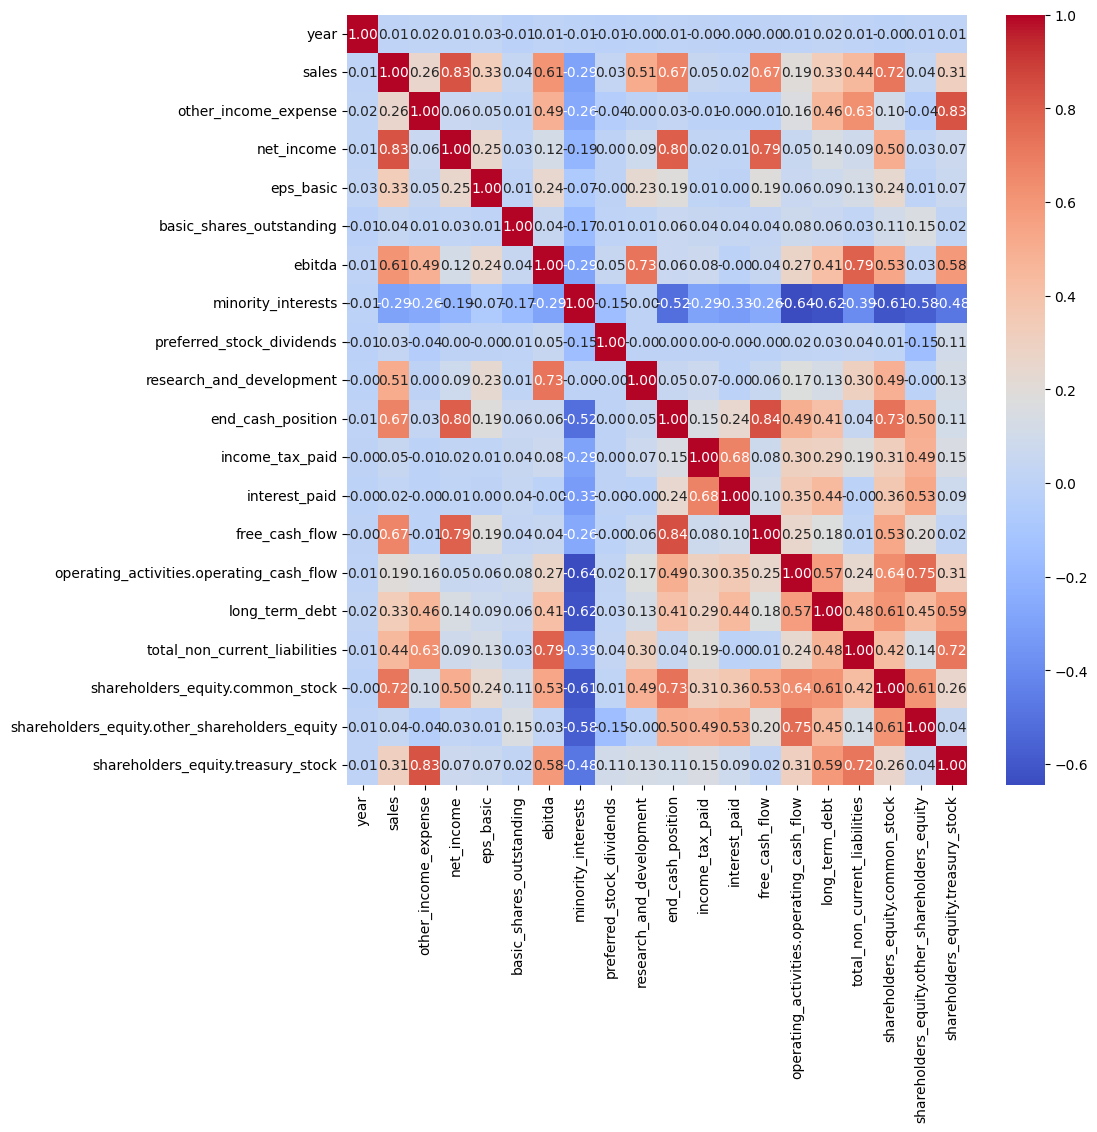

In [751]:


corr_matrix = corrdf2.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [752]:
final_merged_df = final_merged_df[[ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','market cap change']]
final_merged_df = pd.merge(final_merged_df, modified_df_Profile, on='symbol', how='inner')

final_merged_df.head()
final_merged_df.columns.value_counts()

year                                             1
shareholders_equity.common_stock                 1
state                                            1
zip                                              1
employees                                        1
industry                                         1
sector                                           1
exchange                                         1
name                                             1
market cap change                                1
Return On Assets                                 1
Return On Equity                                 1
Profit Margin                                    1
Debt to Equity Ratio                             1
shareholders_equity.treasury_stock               1
shareholders_equity.other_shareholders_equity    1
total_non_current_liabilities                    1
symbol                                           1
long_term_debt                                   1
operating_activities.operating_

### Making Groups in Industry


In [753]:
# Mapping of specific industries to broader categories, including "Others"
industry_to_category = {
    # Technology
    'Software—Infrastructure': 'Technology',
    'Consumer Electronics': 'Technology',
    'Semiconductors': 'Technology',
    'Internet Retail': 'Technology',
    'Internet Content & Information': 'Technology',
    'Software—Application': 'Technology',
    'Software - Infrastructure': 'Technology',
    'Information Technology Services': 'Technology',
    'Software - Application': 'Technology',
    'Communication Equipment': 'Technology',
    'Electronic Components': 'Technology',
    'Computer Hardware': 'Technology',
    'Electronic Gaming & Multimedia': 'Technology',
    'Scientific & Technical Instruments' :'Technology',
    'Semiconductor Equipment & Materials': 'Technology',
    'Electrical Equipment & Parts': 'Technology',
    
    # Healthcare & Pharmaceuticals
    'Insurance—Diversified': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—General': 'Healthcare & Pharmaceuticals',
    'Biotechnology': 'Healthcare & Pharmaceuticals',
    'Diagnostics & Research': 'Healthcare & Pharmaceuticals',
    'Medical Devices': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—Specialty & Generic': 'Healthcare & Pharmaceuticals',
    'Medical Instruments & Supplies': 'Healthcare & Pharmaceuticals',
    'Medical Care Facilities': 'Healthcare & Pharmaceuticals',
    'Medical Distribution': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - General': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - Specialty & Generic': 'Healthcare & Pharmaceuticals',
    'Health Information Services':'Healthcare & Pharmaceuticals',
    'Healthcare Plans':'Healthcare & Pharmaceuticals',
    
    # Financial Services
    'Credit Services': 'Financial Services',
    'Banks—Diversified': 'Financial Services',
    'Banks - Diversified': 'Financial Services',
    'Asset Management': 'Financial Services',
    'Footwear & Accessories': 'Financial Services',
    'Capital Markets': 'Financial Services',
    'Banks—Regional': 'Financial Services',
    'Banks - Regional': 'Financial Services',
    'Financial Data & Stock Exchanges': 'Financial Services',
    'Financial Conglomerates': 'Financial Services',
    'Insurance—Property & Casualty': 'Financial Services',
    'Insurance - Property & Casualty': 'Financial Services',
    'Insurance - Specialty': 'Financial Services',
    'Insurance—Specialty': 'Financial Services',
    'Insurance—Reinsurance': 'Financial Services',
    'Insurance - Life': 'Financial Services',
    'Insurance Brokers': 'Financial Services',
    'Financial Conglomerates':'Financial Services',
    'Insurance Brokers':'Financial Services',

    # Real Estate
    'REIT—Industrial': 'Real Estate',
    'REIT - Hotel & Motel': 'Real Estates',
    'REIT - Retail': 'Real Estate',
    'REIT—Mortgage': 'Real Estate',
    'REIT—Diversified': 'Real Estate',
    'REIT—Healthcare Facilities': 'Real Estate',
    'REIT - Healthcare Facilities': 'Real Estate',
    'REIT—Residential': 'Real Estate',
    'REIT - Residential': 'Real Estate',
    'REIT—Specialty': 'Real Estate',
    'REIT - Specialty': 'Real Estate',
    'REIT—Office': 'Real Estate',
    'REIT - Industrial': 'Real Estate',
    'REIT—Hotel & Motel': 'Real Estate',
    'Real Estate Services': 'Real Estate',
    'Real Estate - Development': 'Real Estate',
    'Real Estate—Development': 'Real Estate',
    'Real Estate—Diversified': 'Real Estate',
    'REIT—Diversified': 'Real Estate',
    'REIT - Diversified': 'Real Estate',
    'REIT—Mortgage': 'Real Estate',
    'REIT - Mortgage': 'Real Estate',
    'REIT—Retail': 'Real Estate',
    'REIT - Retail': 'Real Estate',
    'REIT—Specialty': 'Real Estate',
    'REIT - Specialty': 'Real Estate',
    # Consumer Goods and Retail

    'Apparel Manufacturing': 'Consumer Goods and Retail',
    'Apparel Retail' : 'Consumer Goods and Retail',
    'Auto & Truck Dealerships': 'Consumer Goods and Retail',
    'Household & Personal Products': 'Consumer Goods and Retail',
    'Furnishings, Fixtures & Appliances': 'Consumer Goods and Retail',
    'Specialty Retail': 'Consumer Goods and Retail',
    'Confectioners': 'Consumer Goods and Retail',
    'Grocery Stores': 'Consumer Goods and Retail',
    'Packaged Foods': 'Consumer Goods and Retail',
    'Beverages—Brewers': 'Consumer Goods and Retail',
    'Beverages—Non-Alcoholic': 'Consumer Goods and Retail',
    'Beverages—Wineries & Distilleries': 'Consumer Goods and Retail',
    'Beverages - Non-Alcoholic': 'Consumer Goods and Retail',
    'Beverages - Wineries & Distilleries': 'Consumer Goods and Retail',
    'Luxury Goods': 'Consumer Goods and Retail',
    'Department Stores':'Consumer Goods and Retail',
    'Discount Stores':'Consumer Goods and Retail',
    'Food Distribution':'Consumer Goods and Retail',
    # Energy, Oil, and Gas
    'Oil & Gas E&P'
    'Oil & Gas Equipment & Services':'Energy, Oil, and Gas',
    'Oil & Gas Integrated':'Energy, Oil, and Gas',
    'Oil & Gas Midstream':'Energy, Oil, and Gas',
    'Oil & Gas Refining & Marketing':'Energy, Oil, and Gas',
    'Utilities - Regulated Gas':'Energy, Oil, and Gas',
    'Utilities—Regulated Gas':'Energy, Oil, and Gas',
    'Utilities—Regulated Electric':'Energy, Oil, and Gas',
    'Utilities - Regulated Electric':'Energy, Oil, and Gas',
    'Utilities—Independent Power Producers':'Energy, Oil, and Gas',
    'Utilities—Regulated Water':'Energy, Oil, and Gas',
    'Utilities and Renewable Energy':'Energy, Oil, and Gas',
    'Utilities—Diversified':'Energy, Oil, and Gas',
    'Utilities - Diversified':'Energy, Oil, and Gas',
    #Automotive and Manufacturing
    
    

   #Services and Leisure
    'Broadcasting':'Services and Leisure',
    'Entertainment':'Services and Leisure',
    'Gambling':'Services and Leisure',
    'Leisure':'Services and Leisure',
    'Publishing':'Services and Leisure',
    'Staffing & Employment Services':'Services and Leisure',
    'Consulting Services':'Services and Leisure',
    'Education & Training Services':'Services and Leisure',
    'Personal Services':'Services and Leisure',
    'Restaurants':'Services and Leisure',
    'Recreational Vehicles':'Services and Leisure',
    'Marine Shipping':'Services and Leisure',
    'Trucking':'Services and Leisure',
    'Airlines':'Services and Leisure',
    'Airports & Air Services':'Services and Leisure',
    'Travel Services':'Services and Leisure',
    'Business Equipment & Supplies':'Services and Leisure',

    #Infrastructure and Industrial Services
    'Conglomerates':'Infrastructure and Industrial Services',
    'Integrated Freight & Logistics':'Infrastructure and Industrial Services',
    'Industrial Distribution':'Infrastructure and Industrial Services',
    'Building Materials':'Infrastructure and Industrial Services',
    'Building Products & Equipment':'Infrastructure and Industrial Services',
    'Chemicals':'Infrastructure and Industrial Services',
    'Waste Management':'Infrastructure and Industrial Services',
    'Pollution & Treatment Controls':'Infrastructure and Industrial Services',
    'Infrastructure Operations':'Infrastructure and Industrial Services',
    'Engineering & Construction':'Infrastructure and Industrial Services',
    'Specialty Industrial Machinery':'Infrastructure and Industrial Services',
    'Auto Manufacturers':'Infrastructure and Industrial Services',
    'Auto Parts':'Infrastructure and Industrial Services',
    'Metal Fabrication':'Infrastructure and Industrial Services',
    'Farm & Heavy Construction Machinery':'Infrastructure and Industrial Services',

    #Natural Resources and Research
    'Agricultural Inputs' :'Natural Resources and Research',
    'Paper & Paper Products':'Natural Resources and Research',
    'Lumber & Wood Production':'Natural Resources and Research',
    'Steel':'Natural Resources and Research',
    'Other Industrial Metals & Mining':'Natural Resources and Research',
    'Gold':'Natural Resources and Research',
    'Silver':'Natural Resources and Research',
    'Copper':'Natural Resources and Research',
    'Uranium':'Natural Resources and Research',
    'Other Precious Metals & Mining':'Natural Resources and Research',
    'Coking Coal':'Natural Resources and Research',
    'Thermal Coal':'Natural Resources and Research',
    'Aerospace & Defense':'Natural Resources and Research',
    # Others
    'Shell Companies': 'Others',
    'Utilities—Renewable': 'Others',
    'Utilities - Renewable': 'Others',
}

# Applying the industry-to-category mapping to create a new column for the broader category
final_merged_df['Industry_Category'] = final_merged_df['industry'].map(industry_to_category)

# Handling any industries that were not included in the mapping
final_merged_df['Industry_Category'].fillna('Other', inplace=True)
final_merged_df.head()

year symbol         sales  other_income_expense   net_income  eps_basic  \
0  2020   AAON  5.145510e+08             6529000.0   79009000.0   1.006667   
1  2021   AAON  5.345170e+08               82000.0   58758000.0   0.750000   
2  2022   AAON  8.887880e+08              411000.0  100376000.0   1.260000   
3  2023   AAON  1.168518e+09              516000.0  177623000.0   0.000000   
4  2020    AAP  1.010632e+10           -52006000.0  493021000.0   7.170000   

   basic_shares_outstanding       ebitda  minority_interests  \
0                78253018.0  114514000.0                 0.0   
1                78606298.0   99709000.0                 0.0   
2                79582480.0  162578000.0                 0.0   
3                       0.0  274776000.0                 0.0   
4                68748000.0  996004000.0                 0.0   

   research_and_development  ...  market cap change                    name  \
0                       0.0  ...           0.348512                AAON Inc   
1                       0.0  ...           0.197488                AAON Inc   
2                       0.0  ...          -0.039968                AAON Inc   
3                       0.0  ...          -1.000000                AAON Inc   
4                       0.0  ...          -0.016546  Advance Auto Parts Inc   

   exchange             sector                       industry  employees  \
0    NASDAQ        Industrials  Building Products & Equipment       3856   
1    NASDAQ        Industrials  Building Products & Equipment       3856   
2    NASDAQ        Industrials  Building Products & Equipment       3856   
3    NASDAQ        Industrials  Building Products & Equipment       3856   
4      NYSE  Consumer Cyclical               Specialty Retail      40000   

     zip  state        country                       Industry_Category  
0  74107     OK  United States  Infrastructure and Industrial Services  
1  74107     OK  United States  Infrastructure and Industrial Services  
2  74107     OK  United States  Infrastructure and Industrial Services  
3  74107     OK  United States  Infrastructure and Industrial Services  
4  27609     NC  United States               Consumer Goods and Retail  

[5 rows x 34 columns]

In [754]:
final_merged_df= final_merged_df[['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','market cap change','sector','industry','symbol','Industry_Category']]
final_merged_df.head()

num_unique_sectors = final_merged_df['sector'].nunique()

print(f"Number of unique sectors: {num_unique_sectors}")
num_unique_sectors = final_merged_df['industry'].nunique()

print(f"Number of unique industry: {num_unique_sectors}")

unique_industries = final_merged_df['industry'].unique()

# Print all unique industry names
print(unique_industries)
import pandas as pd

# Convert the unique industries array to a DataFrame
unique_industries_df = pd.DataFrame(unique_industries, columns=['Industry'])




Number of unique sectors: 11
Number of unique industry: 162
['Building Products & Equipment' 'Specialty Retail' 'Consumer Electronics'
 'Other Industrial Metals & Mining' 'Drug Manufacturers—General'
 'Auto & Truck Dealerships' 'Electrical Equipment & Parts'
 'Medical Devices' 'Biotechnology' 'Scientific & Technical Instruments'
 'Copper' 'Information Technology Services' 'REIT - Mortgage'
 'Other Precious Metals & Mining' 'Engineering & Construction'
 'Business Equipment & Supplies' 'Pollution & Treatment Controls'
 'Software - Infrastructure' 'REIT - Retail'
 'Specialty Industrial Machinery' 'Utilities - Renewable'
 'Security & Protection Services' 'Communication Equipment'
 'Advertising Agencies' 'Beverages—Brewers' 'Software—Application'
 'Oil & Gas E&P' 'Drug Manufacturers—Specialty & Generic' 'REIT—Mortgage'
 'Utilities—Regulated Electric' 'Utilities - Regulated Electric'
 'Asset Management' 'Entertainment' 'Software - Application'
 'Computer Hardware' 'Packaged Foods' 'Semicondu

### Scaling/Normalization 

In [755]:
numeric_columns = ['net_income','sales',
       'other_income_expense',  'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

Columns_of_indicators=['Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']

categorical_columns = [ 'sector', 'Industry_Category']


numric_df=final_merged_df[numeric_columns]
Ratio_df= final_merged_df[Columns_of_indicators]
Categorical_df= final_merged_df[categorical_columns] 


In [756]:
final_merged_df.describe()

sales  other_income_expense    net_income     eps_basic  \
count  4.491000e+03          4.491000e+03  4.491000e+03   4491.000000   
mean   2.518896e+11          7.688208e+08  4.632089e+10      1.648047   
std    3.397741e+12          1.979330e+10  1.140188e+12   1038.210561   
min   -2.730500e+10         -4.712772e+10 -4.261200e+11 -63459.414290   
25%    3.301500e+07         -1.466500e+06 -9.334366e+06     -0.110000   
50%    9.713910e+08          0.000000e+00  3.618500e+07      0.280000   
75%    9.626000e+09          3.321050e+05  7.468150e+08      3.600000   
max    1.019150e+14          7.989050e+11  4.865810e+13  13495.000000   

       basic_shares_outstanding        ebitda  minority_interests  \
count              4.491000e+03  4.491000e+03        4.491000e+03   
mean               7.936213e+08  2.295446e+10       -3.573191e+08   
std                5.430396e+09  2.727591e+11        3.577171e+09   
min                0.000000e+00 -1.507700e+10       -8.382000e+10   
25%                2.608649e+07 -6.749565e+05       -2.000000e+05   
50%                8.892767e+07  4.030200e+07        0.000000e+00   
75%                3.960858e+08  1.100395e+09        0.000000e+00   
max                1.830210e+11  1.032800e+13        2.681700e+10   

       research_and_development  end_cash_position  income_tax_paid  ...  \
count              4.491000e+03       4.491000e+03     4.491000e+03  ...   
mean               2.122099e+09       2.607938e+11     5.959854e+08  ...   
std                3.100103e+10       5.302784e+12     7.016996e+09  ...   
min               -2.396620e+05      -5.000000e+06    -6.900000e+07  ...   
25%                0.000000e+00       2.383852e+07     0.000000e+00  ...   
50%                0.000000e+00       2.014210e+08     0.000000e+00  ...   
75%                7.768821e+06       1.768392e+09     8.359500e+06  ...   
max                1.257220e+12       1.772687e+14     2.169220e+11  ...   

       long_term_debt  total_non_current_liabilities  \
count    4.491000e+03                   4.491000e+03   
mean     9.593543e+10                   6.485217e+10   
std      8.531336e+11                   7.489935e+11   
min      0.000000e+00                   0.000000e+00   
25%      4.419412e+06                   4.570640e+05   
50%      3.902570e+08                   1.826990e+08   
75%      4.618108e+09                   3.970750e+09   
max      1.707463e+13                   2.107925e+13   

       shareholders_equity.common_stock  \
count                      4.491000e+03   
mean                       1.174952e+10   
std                        1.051374e+11   
min                       -3.015049e+09   
25%                        1.380000e+05   
50%                        9.400000e+06   
75%                        2.719175e+08   
max                        2.141513e+12   

       shareholders_equity.other_shareholders_equity  \
count                                   4.491000e+03   
mean                                    4.113241e+09   
std                                     9.018886e+10   
min                                    -1.166273e+12   
25%                                    -6.123712e+06   
50%                                     0.000000e+00   
75%                                     0.000000e+00   
max                                     2.986478e+12   

       shareholders_equity.treasury_stock  Debt to Equity Ratio  \
count                        4.491000e+03           4491.000000   
mean                         8.034779e+09             41.022961   
std                          1.049691e+11           1831.623682   
min                          0.000000e+00           -214.793185   
25%                          0.000000e+00              0.033745   
50%                          0.000000e+00              0.355314   
75%                          3.935200e+07              1.020349   
max                          3.736562e+12          89276.340909   

       Profit Margin  Return On Equity  Return 

In [757]:
import pandas as pd

def count_zero_values(df):
    """
    Counts the number of zero values in each column of a DataFrame.

    Parameters:
    - df: Pandas DataFrame.

    Returns:
    - A dictionary with column names as keys and counts of zero values as values.
    """
    zero_count_dict = {}
    for column in df.columns:
        zero_count = (df[column] == 0).sum()
        zero_count_dict[column] = zero_count
    return zero_count_dict

zero_counts = count_zero_values(final_merged_df)

for column, count in zero_counts.items():
    print(f"{column}: {count} zero ")


sales: 509 zero 
other_income_expense: 1589 zero 
net_income: 0 zero 
eps_basic: 279 zero 
basic_shares_outstanding: 260 zero 
ebitda: 586 zero 
minority_interests: 2758 zero 
research_and_development: 3035 zero 
end_cash_position: 29 zero 
income_tax_paid: 2730 zero 
interest_paid: 2467 zero 
free_cash_flow: 7 zero 
operating_activities.operating_cash_flow: 187 zero 
long_term_debt: 525 zero 
total_non_current_liabilities: 866 zero 
shareholders_equity.common_stock: 219 zero 
shareholders_equity.other_shareholders_equity: 1786 zero 
shareholders_equity.treasury_stock: 2825 zero 
Debt to Equity Ratio: 358 zero 
Profit Margin: 509 zero 
Return On Equity: 15 zero 
Return On Assets: 599 zero 
market cap change: 354 zero 
sector: 0 zero 
industry: 0 zero 
symbol: 0 zero 
Industry_Category: 0 zero 


#### One Hot encoder 


In [758]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
df_categorical_encoded_sparse = onehot.fit_transform(Categorical_df)

df_categorical_encoded = df_categorical_encoded_sparse.toarray()

### One Approach


In [759]:

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)

X_transformed = qt.fit_transform(numric_df)
X_transformed_Indicators= qt.fit_transform(Ratio_df)



# Combine all column names in the order they are concatenated
combined_data = np.concatenate([X_transformed, X_transformed_Indicators, df_categorical_encoded], axis=1)


combined_data_df = pd.DataFrame(combined_data)
combined_data_df.head(20)


0         1         2         3         4         5         6   \
0   0.138699 -0.149809  1.009015  0.216981 -0.070342  0.146564  0.198258   
1   0.085250 -0.140410  0.594752  0.149242 -0.069129  0.125253  0.198258   
2   0.181570 -0.020153  0.692310  0.275376 -0.059536  0.207018  0.198258   
3   0.293957  0.053426  0.713143 -0.263985 -5.199338  0.306631  0.198258   
4   0.561694  0.689268 -1.241603  0.997920 -0.126744  0.650516  0.198258   
5   0.627006  0.707236  0.969805  1.128735 -0.169435  0.676891  0.198258   
6   0.569012  0.709212 -0.979260  1.067095 -0.204512  0.648512  0.198258   
7   1.838776  1.555602 -1.349868  0.630254  2.577748  1.815100  0.198258   
8   1.985971  1.616402  1.378092  0.871283  2.549852  1.976722  0.198258   
9   2.007034  1.641819 -1.609494  0.919282  2.529775  2.003772  0.198258   
10  1.996036  1.632300 -1.750222  0.920808  2.511200  1.995037  0.198258   
11  0.965367  0.934021  0.033880  0.365171  1.177965  1.139479 -1.787526   
12  1.326949  1.057998  0.033880  0.981540  1.175092  1.387485 -1.998116   
13  1.132175  1.020920  0.033880  0.686350  1.169597  1.285069 -1.838058   
14  0.794148  0.976999  0.033880 -0.020937  1.169342  1.160675 -1.762131   
15  1.039153  1.093257 -2.699770  0.539873  1.335742  1.272751 -0.895780   
16  1.324073  1.167940 -2.392695  0.951584  1.359391  1.445154 -0.916587   
17  1.334054  1.186424 -2.369192  0.966351  1.360067  1.444052 -0.951614   
18  1.053783  1.155330 -2.576954  0.542776  1.356813  1.354262 -0.963230   
19  0.381770  0.585755  1.169569  1.270206 -0.800422  0.410879  0.198258   

          7         8         9   ...   36   37   38   39   40   41   42   43  \
0  -0.417002 -0.332736 -0.506348  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  -0.417002 -1.108181  0.667103  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  -0.417002 -0.994611  0.823099  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3  -0.417002 -0.904544  1.047193  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  -0.417002  0.479091  1.256920  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  -0.417002  0.392660  1.314262  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  -0.417002  0.106572  1.138728  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   2.206051  1.384647  2.470512  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   2.242308  1.367314  2.651424  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   2.317602  1.311776  2.583481  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  2.371805  1.340861  2.574208  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11 -0.417002  1.013826 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
12 -0.417002  1.068403 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
13 -0.417002  1.043613 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
14 -0.417002  0.954137 -0.506348  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
15  1.917900  1.045107  1.756697  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
16  1.968449  1.092798  2.088980  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  1.928185  1.072749  1.976828  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
18  2.006845  1.180101  2.211728  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
19 -0.417002 -1.282724 -0.506348  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     44   45  
0   0.0  0.0  
1   0.0  0.0  
2   0.0  0.0  
3   0.0  0.0  
4   0.0  0.0  
5   0.0  0.0  
6   0.0  0.0  
7   0.0  1.0  
8   0.0  1.0  
9   0.0  1.0  
10  0.0  1.0  
11  0.0  0.0  
12  0.0  0.0  
13  0.0  0.0  
14  0.0  0.0  
15  0.0  0.0  
16  0.0  0.0  
17  0.0  0.0  
18  0.0  0.0  
19  0.0  0.0  

[20 rows x 46 columns]

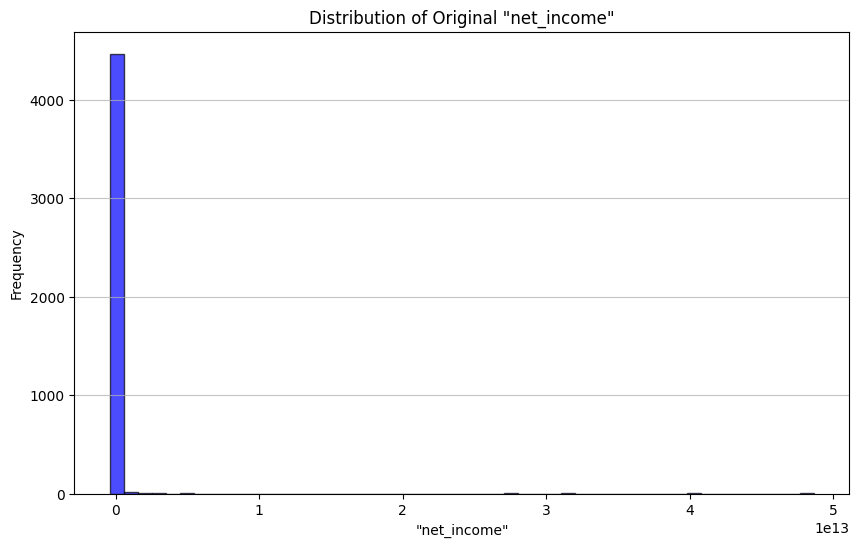

In [760]:
import matplotlib.pyplot as plt

original_net_income = numric_df['net_income']

plt.figure(figsize=(10, 6))
plt.hist(original_net_income, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Original "net_income"')
plt.xlabel('"net_income"')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


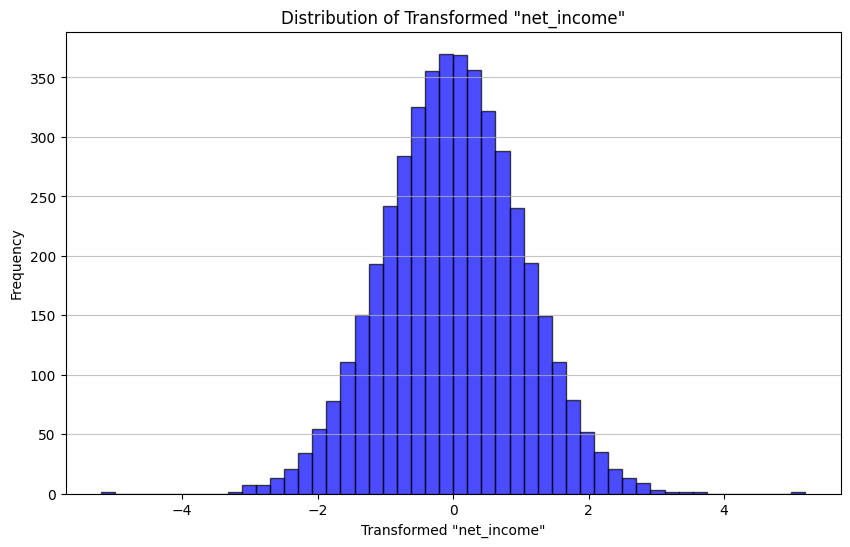

In [761]:
import matplotlib.pyplot as plt

net_income_transformed = X_transformed[:, 0]

plt.figure(figsize=(10, 6))
plt.hist(net_income_transformed, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Transformed "net_income"')
plt.xlabel('Transformed "net_income"')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [762]:
combined_data_Without_Categorical = np.concatenate([X_transformed, X_transformed_Indicators], axis=1)


combined_data_df_Without_Categorical = pd.DataFrame(combined_data_Without_Categorical)
combined_data_df_Without_Categorical.head(20)


0         1         2         3         4         5         6   \
0   0.138699 -0.149809  1.009015  0.216981 -0.070342  0.146564  0.198258   
1   0.085250 -0.140410  0.594752  0.149242 -0.069129  0.125253  0.198258   
2   0.181570 -0.020153  0.692310  0.275376 -0.059536  0.207018  0.198258   
3   0.293957  0.053426  0.713143 -0.263985 -5.199338  0.306631  0.198258   
4   0.561694  0.689268 -1.241603  0.997920 -0.126744  0.650516  0.198258   
5   0.627006  0.707236  0.969805  1.128735 -0.169435  0.676891  0.198258   
6   0.569012  0.709212 -0.979260  1.067095 -0.204512  0.648512  0.198258   
7   1.838776  1.555602 -1.349868  0.630254  2.577748  1.815100  0.198258   
8   1.985971  1.616402  1.378092  0.871283  2.549852  1.976722  0.198258   
9   2.007034  1.641819 -1.609494  0.919282  2.529775  2.003772  0.198258   
10  1.996036  1.632300 -1.750222  0.920808  2.511200  1.995037  0.198258   
11  0.965367  0.934021  0.033880  0.365171  1.177965  1.139479 -1.787526   
12  1.326949  1.057998  0.033880  0.981540  1.175092  1.387485 -1.998116   
13  1.132175  1.020920  0.033880  0.686350  1.169597  1.285069 -1.838058   
14  0.794148  0.976999  0.033880 -0.020937  1.169342  1.160675 -1.762131   
15  1.039153  1.093257 -2.699770  0.539873  1.335742  1.272751 -0.895780   
16  1.324073  1.167940 -2.392695  0.951584  1.359391  1.445154 -0.916587   
17  1.334054  1.186424 -2.369192  0.966351  1.360067  1.444052 -0.951614   
18  1.053783  1.155330 -2.576954  0.542776  1.356813  1.354262 -0.963230   
19  0.381770  0.585755  1.169569  1.270206 -0.800422  0.410879  0.198258   

          7         8         9   ...        12        13        14        15  \
0  -0.417002 -0.332736 -0.506348  ...  0.217056 -5.199338 -0.218170 -0.600200   
1  -0.417002 -1.108181  0.667103  ...  0.072803 -0.368339 -0.076599 -0.598678   
2  -0.417002 -0.994611  0.823099  ...  0.016433 -0.256790 -0.066035 -0.537811   
3  -0.417002 -0.904544  1.047193  ...  0.232486 -0.338452 -0.102653 -0.535083   
4  -0.417002  0.479091  1.256920  ...  0.671664  0.552734  0.647857 -1.220640   
5  -0.417002  0.392660  1.314262  ...  0.713901  0.585369  0.662613 -1.220640   
6  -0.417002  0.106572  1.138728  ...  0.683764  0.596918  0.673517 -1.220640   
7   2.206051  1.384647  2.470512  ...  1.874103  1.546254  1.802608  1.797877   
8   2.242308  1.367314  2.651424  ...  1.960901  1.594382  1.842956  1.875807   
9   2.317602  1.311776  2.583481  ...  2.050593  1.547378  1.786228  1.939564   
10  2.371805  1.340861  2.574208  ...  1.996831  1.532401  1.776457  1.983017   
11 -0.417002  1.013826 -0.506348  ...  1.022895  0.948639  1.113565  0.890520   
12 -0.417002  1.068403 -0.506348  ...  1.422049  0.933198  1.112511  0.888542   
13 -0.417002  1.043613 -0.506348  ...  1.241491  0.966600  1.139331  0.887810   
14 -0.417002  0.954137 -0.506348  ...  1.014148  1.027247  1.159370  0.887810   
15  1.917900  1.045107  1.756697  ...  1.422248  1.478284  1.677823  0.099274   
16  1.968449  1.092798  2.088980  ...  1.515997  1.447754  1.633611  0.099274   
17  1.928185  1.072749  1.976828  ...  1.509317  1.425094  1.616849  0.099274   
18  2.006845  1.180101  2.211728  ...  1.460428  1.388543  1.599630  0.099274   
19 -0.417002 -1.282724 -0.506348  ...  0.636669  0.344726  0.425899 -0.496390   

          16        17        18        19        20        21  
0   0.138444 -5.199338 -0.970025  0.629128  0.792969  1.561425  
1   0.138444 -5.199338 -0.483604  0.426217  0.316662  0.981564  
2   0.138444 -5.199338 -0.368259  0.446261  0.619125  1.228600  
3   0.138444 -5.199338 -0.538549  0.623742  0.852812  1.654636  
4  -0.875873  1.120334  0.560463  0.013788  0.399137  0.433592  
5  -0.856649  1.194957  0.710679  0.072379  0.702414  0.535277  
6  -0.963008  1.227188  0.907849 -0.009855  0.660998  0.435679  
7  -1.370356 -5.199338  1.086713  0.829006  1.593541  1.570802  
8   1.635485 -5.199338  1.194171  1.019066  1.804883  2.010961  
9  -2.276625 -5.199338  1.303424  0.998002  1.881759  2.06207

normalize market cap column for better visualization: we take he outliers and make them closer to the boxpolt lowe and upper bound. 

In [763]:
def cap_outliers(df, columns):
    

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        
    return df

final_merged_df = cap_outliers(final_merged_df, ["market cap change"])

## TSNE


### TSNE For Mixed DateSet 3D

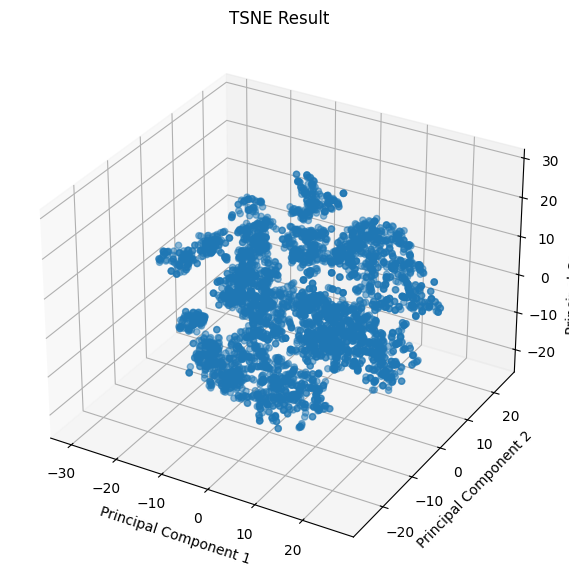

In [764]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne3 = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne3[:, 0], combined_data_tsne3[:, 1], combined_data_tsne3[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()



### TSNE For Not Mixed DateSet 3D

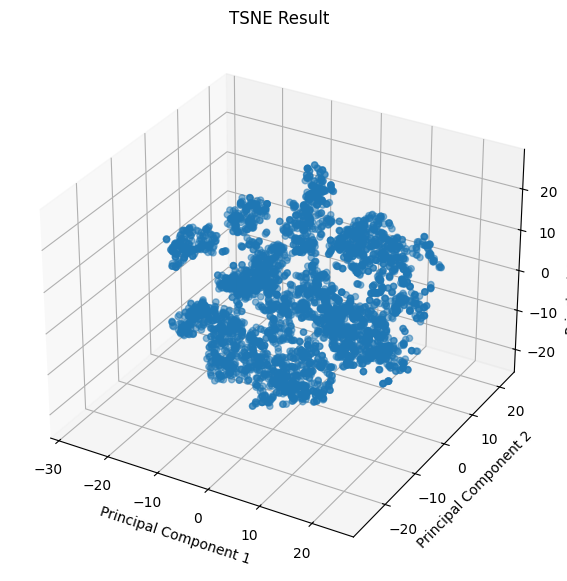

In [765]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt




tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne3N = tsne.fit_transform(combined_data_df_Without_Categorical)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne3N[:, 0], combined_data_tsne3N[:, 1], combined_data_tsne3N[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()


### TSNE For Mixed DateSet 2D

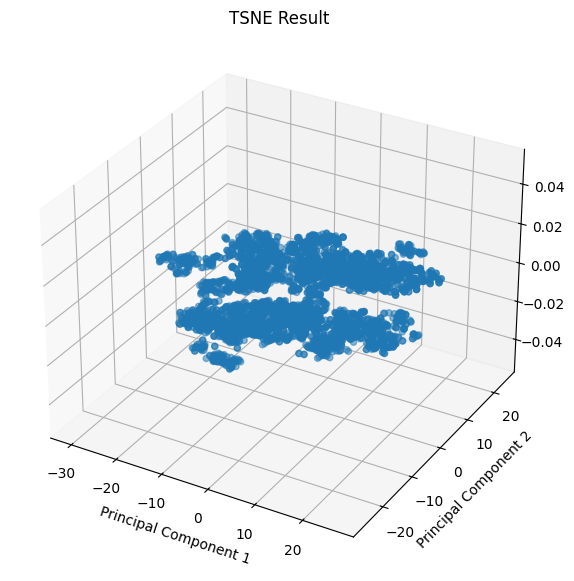

In [766]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



tsne2 = TSNE(n_components=2, perplexity=30, random_state=0)
combined_data_tsne2 = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('TSNE Result')
plt.show()



### TSNE For Not Mixed DateSet 2D

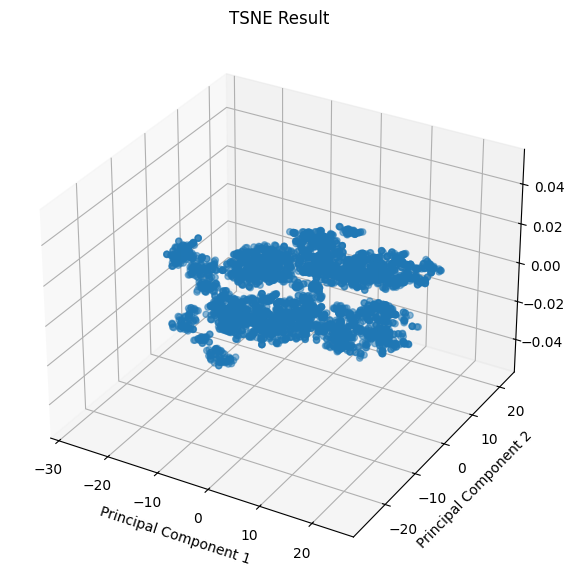

In [767]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



tsne2 = TSNE(n_components=2, perplexity=30, random_state=0)
combined_data_tsne2N = tsne.fit_transform(combined_data_df_Without_Categorical)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('TSNE Result')
plt.show()


## TSNE DBSCAN 3D for mixed 

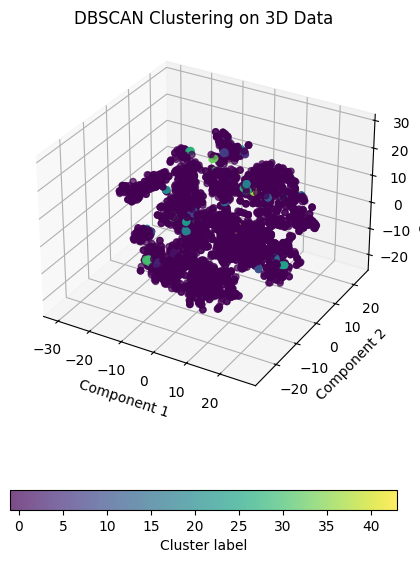

Silhouette Score for DBSCAN: -0.635


In [768]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  
dbscan_labels = dbscan.fit_predict(combined_data_tsne3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') 

scatter = ax.scatter(combined_data_tsne3[:, 0], combined_data_tsne3[:, 1], combined_data_tsne3[:, 2], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('DBSCAN Clustering on 3D Data')

plt.colorbar(scatter, label='Cluster label', shrink=0.5, orientation='horizontal')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne3, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 3D for not mixed 

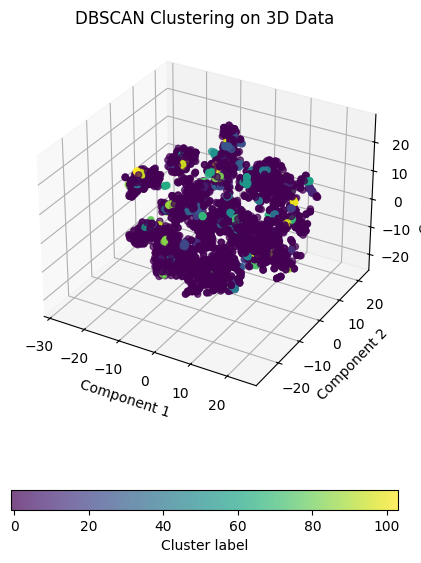

Silhouette Score for DBSCAN: -0.551


In [769]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_optimal = 0.7  
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  
dbscan_labels = dbscan.fit_predict(combined_data_tsne3N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  

scatter = ax.scatter(combined_data_tsne3N[:, 0], combined_data_tsne3N[:, 1], combined_data_tsne3N[:, 2], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('DBSCAN Clustering on 3D Data')

plt.colorbar(scatter, label='Cluster label', shrink=0.5, orientation='horizontal')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne3N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 2D for mixed 

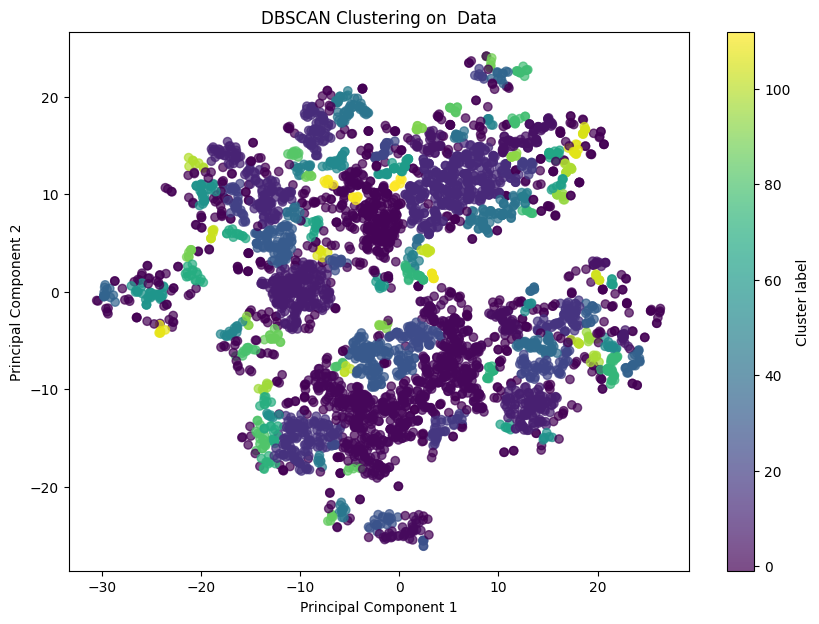

Silhouette Score for DBSCAN: -0.362


In [770]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)
dbscan_labels = dbscan.fit_predict(combined_data_tsne2[:, :2])  

plt.figure(figsize=(10, 7))
plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on  Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne2, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

##  TSNE DBSCAN 2D for not mixed 

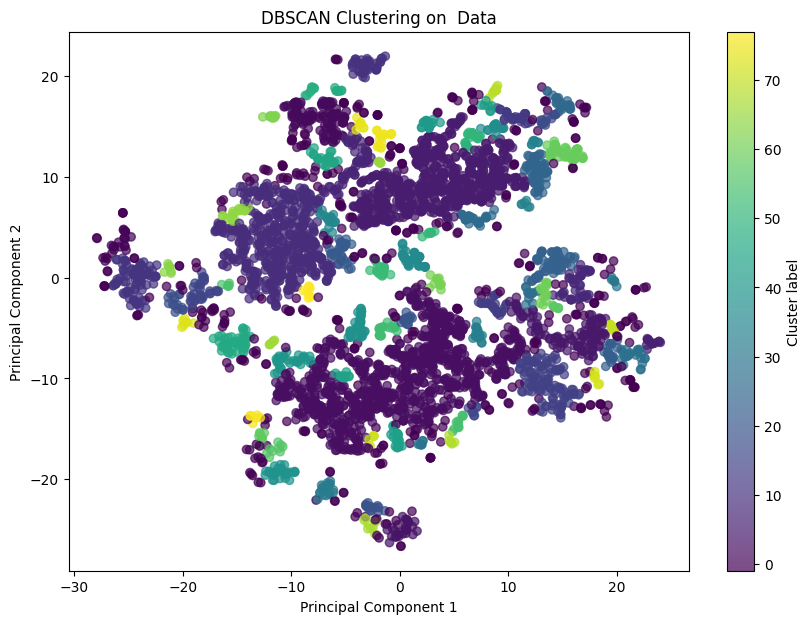

Silhouette Score for DBSCAN: -0.328


In [771]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6) 
dbscan_labels = dbscan.fit_predict(combined_data_tsne2N[:, :2])  


plt.figure(figsize=(10, 7))
plt.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on  Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(combined_data_tsne2N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

## TSNE Kmeans 2D for mixed 

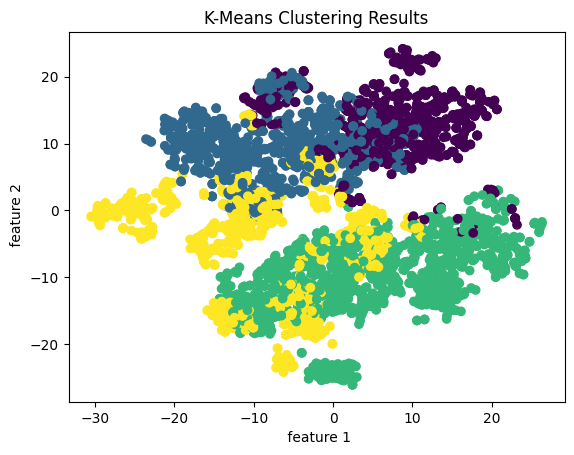

In [772]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(combined_data_tsne2)

plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


# TSNE Kmeans 2D for not mixed

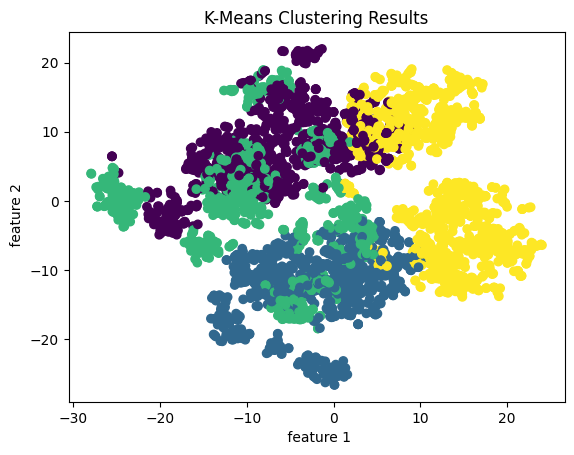

In [773]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(combined_data_tsne2N)

plt.scatter(combined_data_tsne2N[:, 0], combined_data_tsne2N[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


## PCA For Mixed DateSet 3D

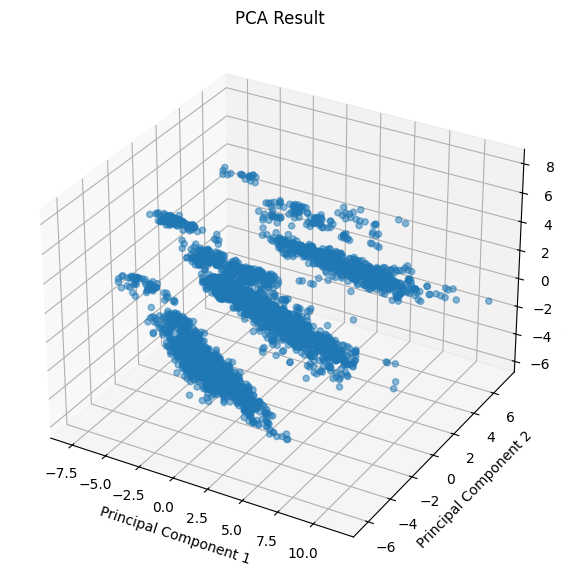

In [774]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

pca3 = PCA(n_components=n_components)

pca_result3 = pca3.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()


## PCA For Not Mixed DateSet 3D

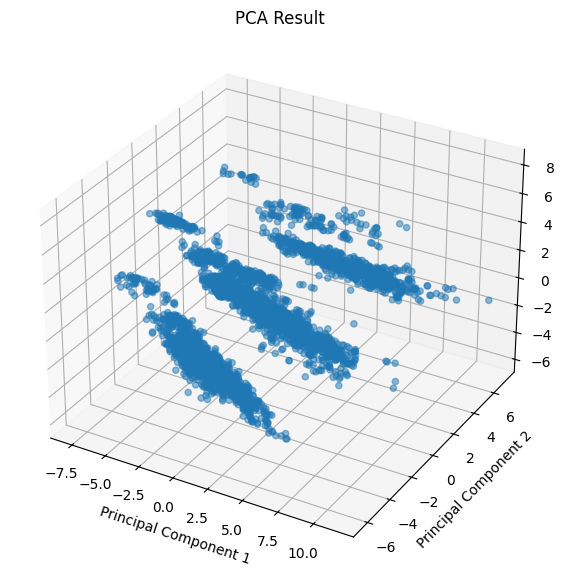

In [775]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

pca3N = PCA(n_components=n_components)

pca_result3N = pca3N.fit_transform(combined_data_df_Without_Categorical)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

## PCA for Robust Scaling 3D not mixed

In [776]:
scaler = RobustScaler()

# Fit the scaler to the data and transform it
RobustScaled_data_Without_Categorical = scaler.fit_transform(combined_data_Without_Categorical)

# Convert the scaled data back to a pandas DataFrame
RobustScaled_data_Without_Categorical = pd.DataFrame(RobustScaled_data_Without_Categorical)

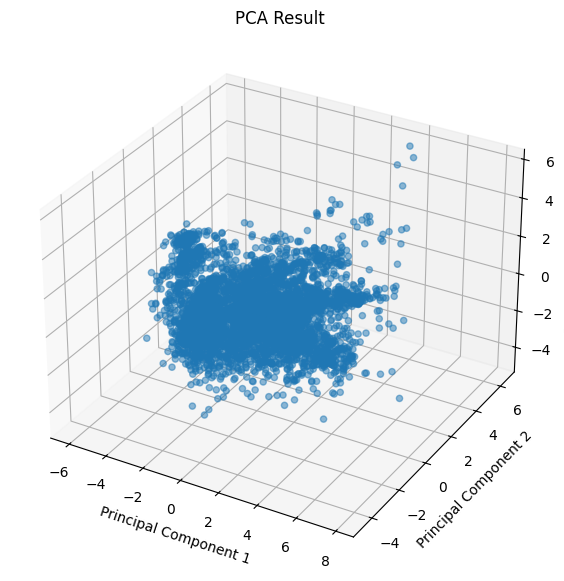

In [777]:

n_components = 3

pca3NR = PCA(n_components=n_components)

pca_result3NR = pca3NR.fit_transform(RobustScaled_data_Without_Categorical)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

## PCA For Mixed DateSet 2D

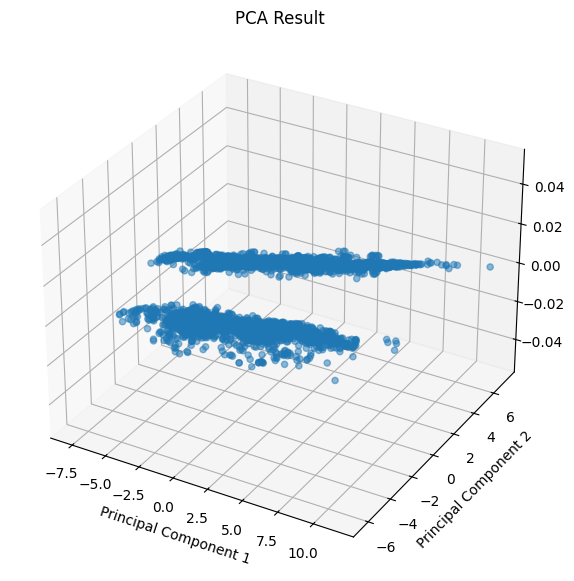

In [778]:

n_components = 2

pca2 = PCA(n_components=n_components)

pca_result2 = pca2.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result2[:, 0], pca_result2[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()

## PCA For Not Mixed DateSet 2D

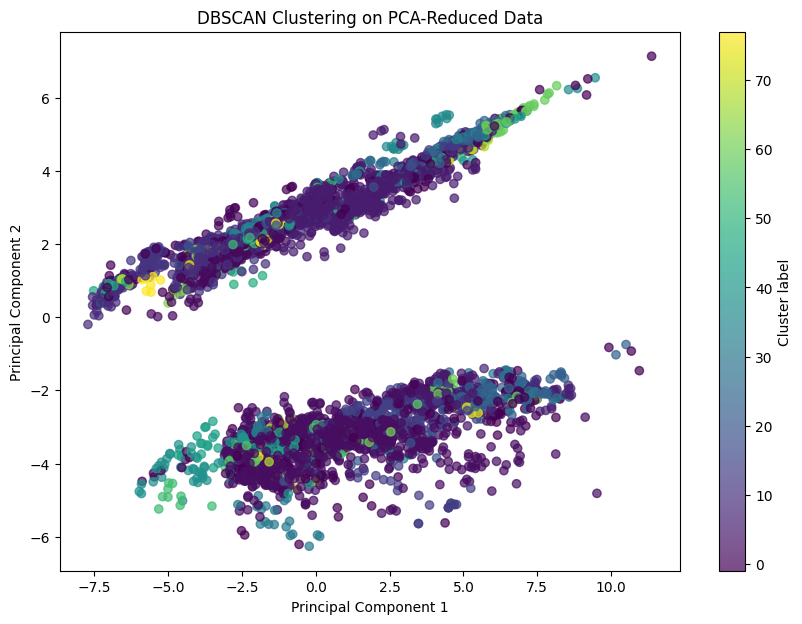

In [779]:
n_components = 2

pca2N = PCA(n_components=n_components)

pca_result2N = pca2N.fit_transform(combined_data_df_Without_Categorical)


plt.figure(figsize=(10, 7))
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()

##  PCA DBSCAN 3D for mixed 

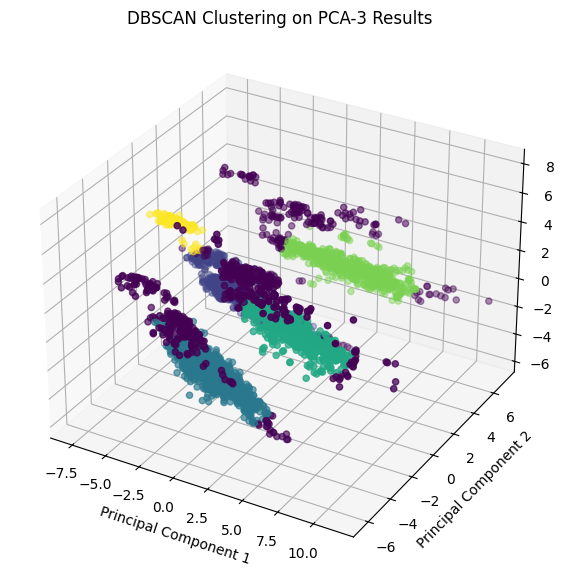

             mean    median       std  min       max  count
cluster                                                    
-1      -0.010164  0.000000  0.452020 -1.0  1.020295    732
 0      -0.006147  0.000000  0.496993 -1.0  1.020295   1289
 1      -0.017813  0.000000  0.532467 -1.0  1.020295    951
 2       0.048787  0.031018  0.461195 -1.0  1.020295    586
 3       0.008705 -0.018196  0.382786 -1.0  1.020295    679
 4       0.058518  0.000000  0.624684 -1.0  1.020295    254


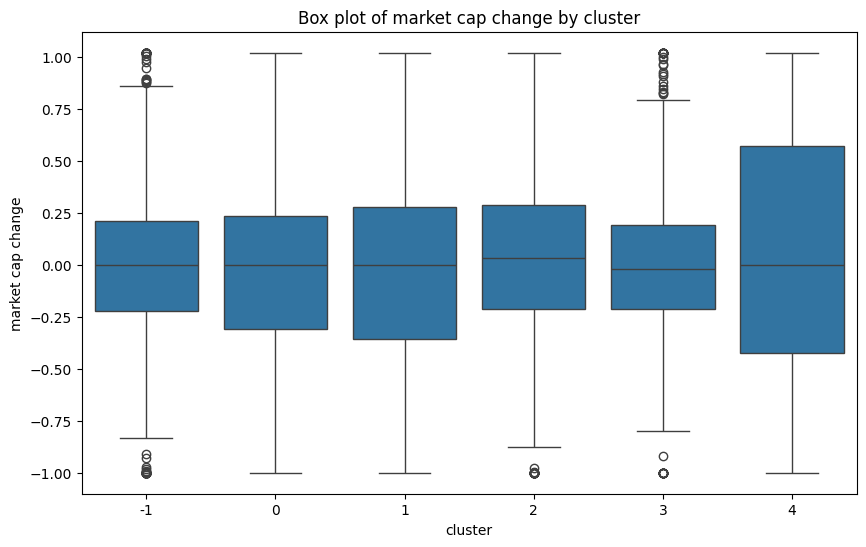

Cluster sizes:
 cluster
-1     732
 0    1289
 1     951
 2     586
 3     679
 4     254
dtype: int64


In [780]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

eps_optimal = 1.5

dbscan = DBSCAN(eps=eps_optimal, min_samples=200)
dbscan_labels = dbscan.fit_predict(pca_result3) 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=dbscan_labels, cmap='viridis')

ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()


final_merged_df['cluster'] = dbscan_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(cluster_stats)

for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()

cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

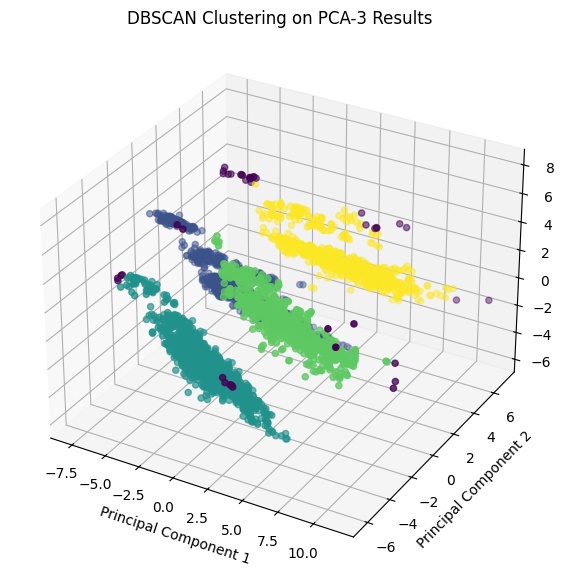

Silhouette Score for DBSCAN: 0.495
             mean    median       std  min       max  count
cluster                                                    
-1       0.039767  0.016006  0.463953 -1.0  1.020295     43
 0       0.001783  0.000000  0.519716 -1.0  1.020295   1616
 1      -0.008469  0.000000  0.517429 -1.0  1.020295   1198
 2       0.027268  0.000000  0.454280 -1.0  1.020295    809
 3       0.000674 -0.021599  0.395429 -1.0  1.020295    825


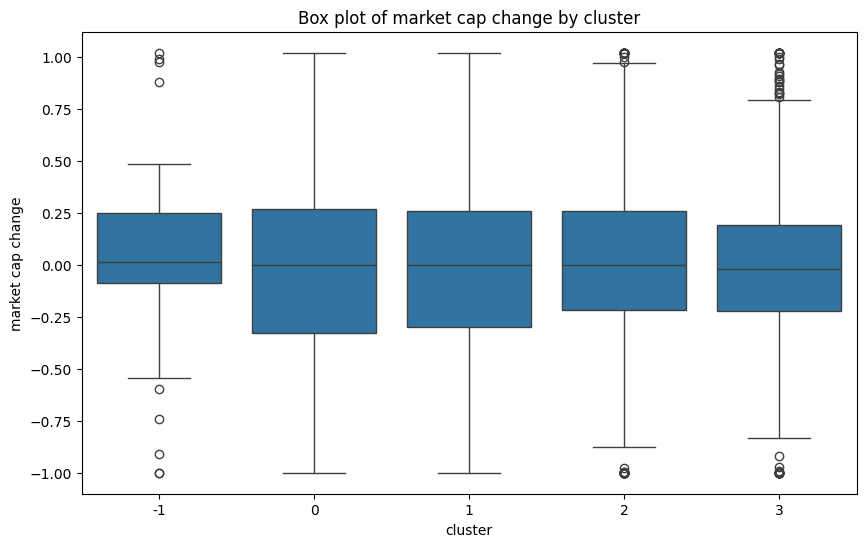

Cluster sizes:
 cluster
-1      43
 0    1616
 1    1198
 2     809
 3     825
dtype: int64


In [781]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

eps_optimal = 2
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3N) 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=dbscan_labels, cmap='viridis')

ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")





final_merged_df['cluster'] = dbscan_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(cluster_stats)

# This loop generates a box plot for each indicator across clusters
for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()

cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

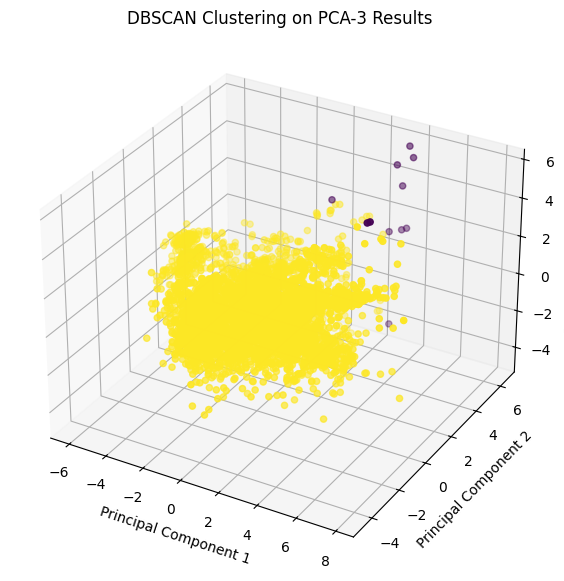

Silhouette Score for DBSCAN: 0.493


In [782]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

eps_optimal = 2
# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3NR)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=dbscan_labels, cmap='viridis')

ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3NR, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")



In [783]:
## Without PCA Just Not Mixed
eps_optimal = 2
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(combined_data_df_Without_Categorical)
silhouette_avg_dbscan = silhouette_score(combined_data_df_Without_Categorical, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

Silhouette Score for DBSCAN: -0.120


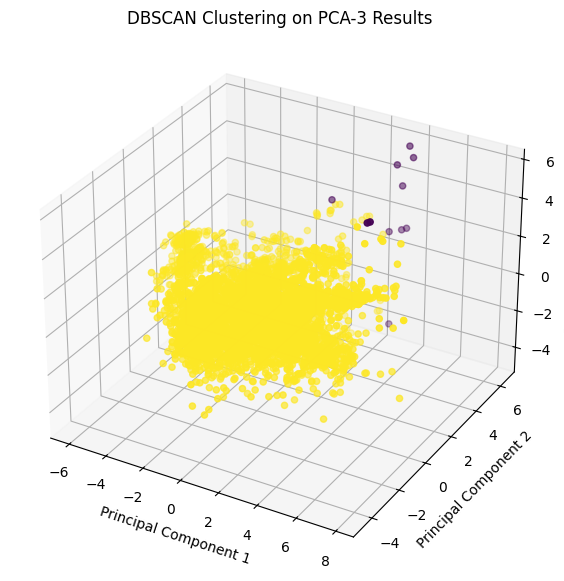

Silhouette Score for DBSCAN: 0.493


In [784]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

eps_optimal = 2
dbscan = DBSCAN(eps=eps_optimal, min_samples=60)
dbscan_labels = dbscan.fit_predict(pca_result3NR) 

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=dbscan_labels, cmap='viridis')

ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result3NR, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

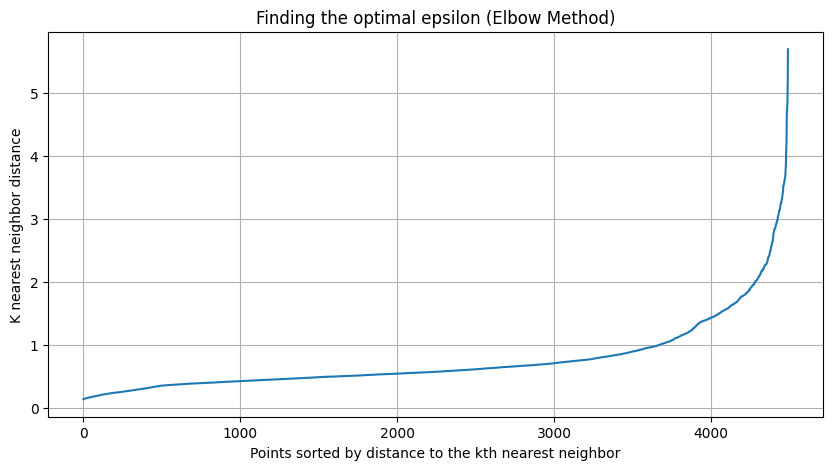

In [785]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


min_samples = 60

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3N)
distances, indices = neighbors.kneighbors(pca_result3N)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


##  PCA DBSCAN 2D for  mixed 

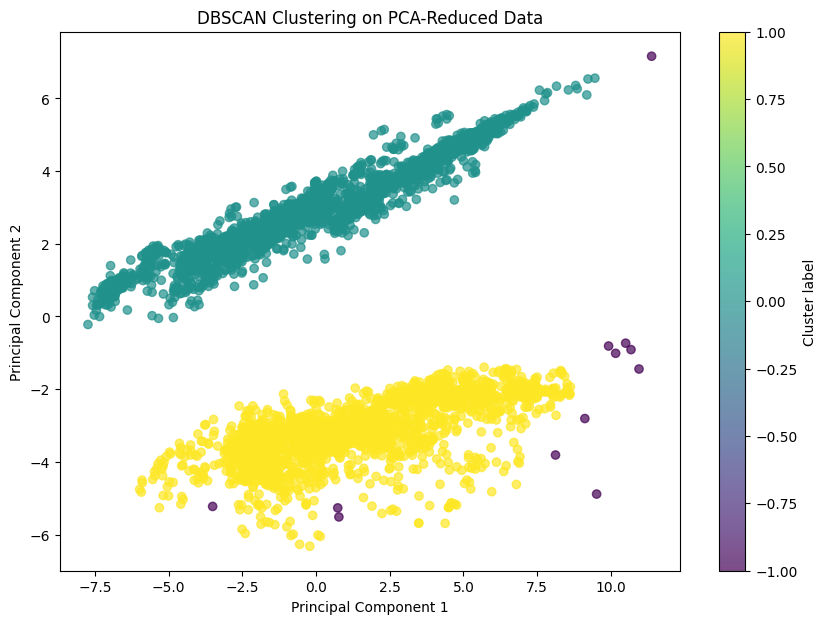

Silhouette Score for DBSCAN: 0.427
             mean    median       std  min       max  count
cluster                                                    
-1      -0.012888  0.051041  0.422355 -1.0  0.486765     12
 0       0.002670 -0.000891  0.481353 -1.0  1.020295   2466
 1       0.005281  0.000000  0.492946 -1.0  1.020295   2013


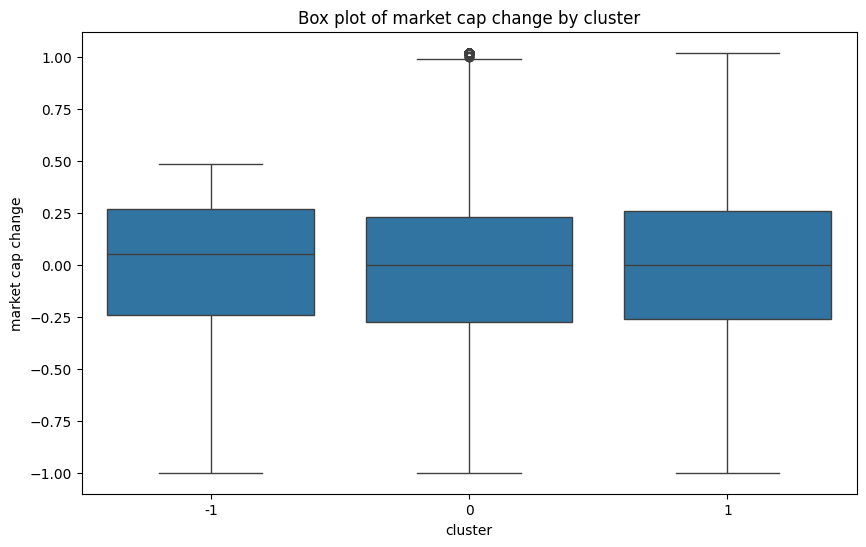

Cluster sizes:
 cluster
-1      12
 0    2466
 1    2013
dtype: int64


In [786]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  
dbscan_labels = dbscan.fit_predict(pca_result2[:, :2]) 


plt.figure(figsize=(10, 7))
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result2, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")



final_merged_df['cluster'] = dbscan_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)

# For visualization, let's create box plots for each indicator within each cluster
# This loop generates a box plot for each indicator across clusters
for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()

cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

##  PCA DBSCAN 2D for Not mixed 

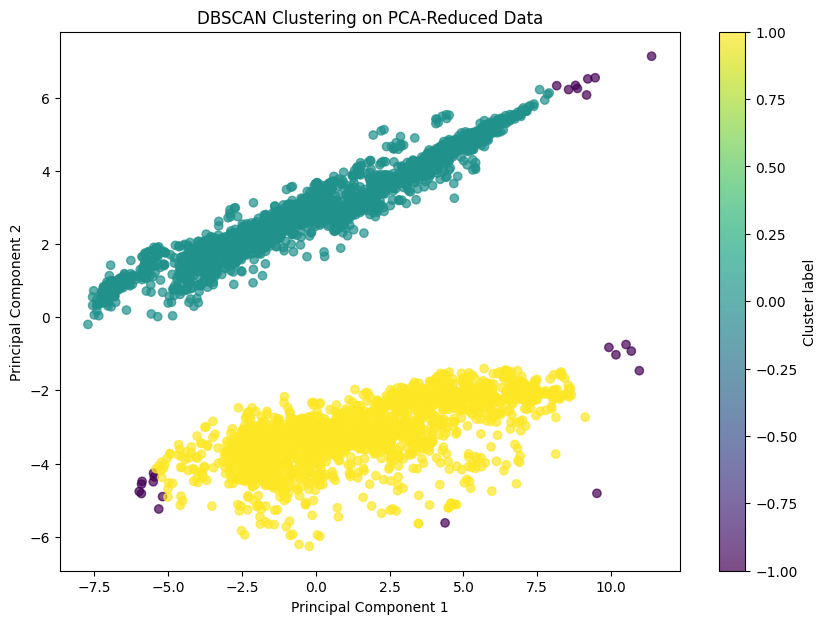

Silhouette Score for DBSCAN: 0.464


In [787]:
from sklearn.cluster import DBSCAN

eps_optimal = 1.4

dbscan = DBSCAN(eps=eps_optimal, min_samples=100) 
dbscan_labels = dbscan.fit_predict(pca_result2N[:, :2]) 

plt.figure(figsize=(10, 7))
plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()
silhouette_avg_dbscan = silhouette_score(pca_result2N, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

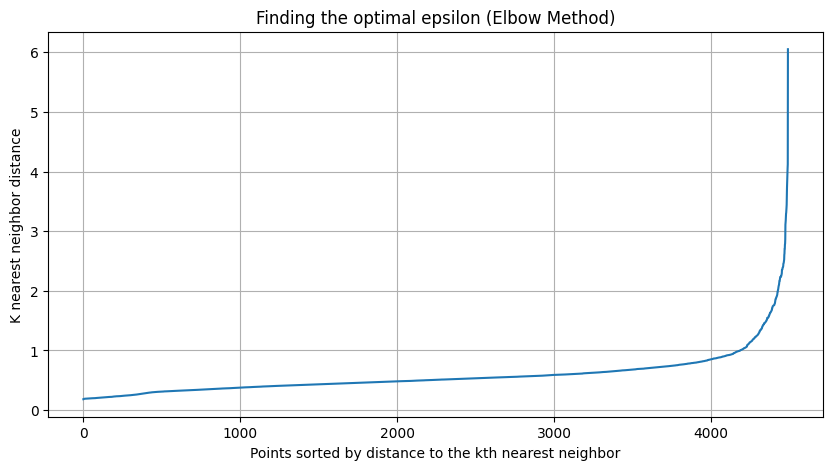

In [788]:
min_samples = 100
# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result2N)
distances, indices = neighbors.kneighbors(pca_result2N)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


## Find Best Epsilon

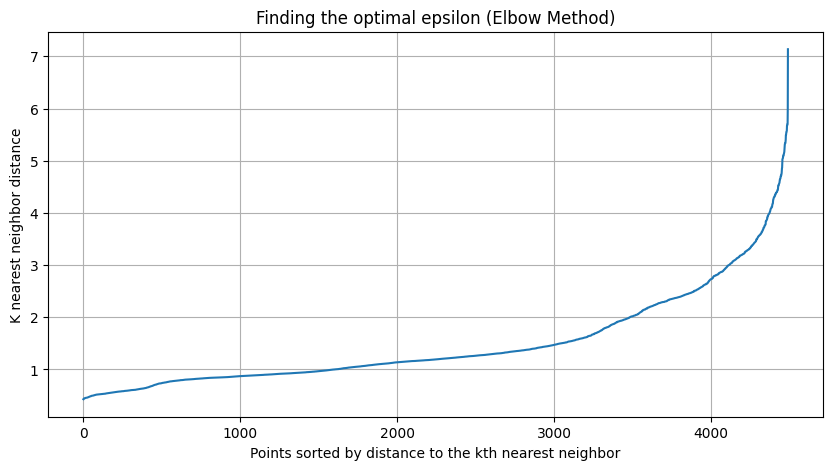

In [789]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


min_samples = 200

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3)
distances, indices = neighbors.kneighbors(pca_result3)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


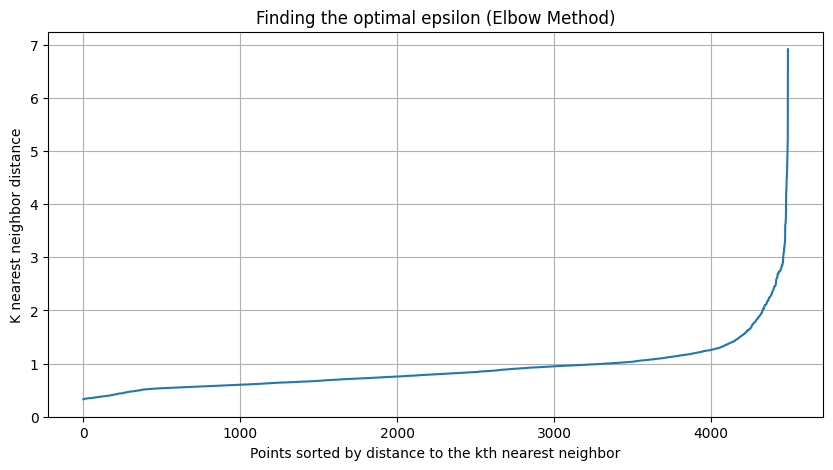

In [790]:
min_samples = 200

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result2)
distances, indices = neighbors.kneighbors(pca_result2)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


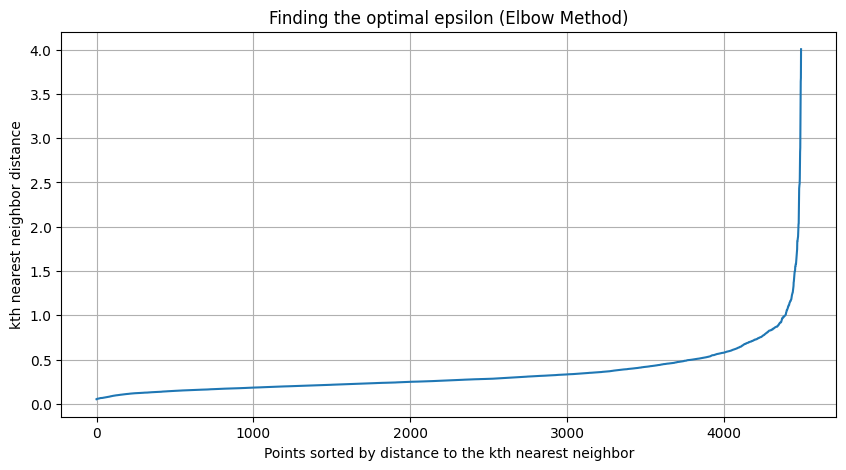

In [791]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt



min_samples = 10

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result3N)
distances, indices = neighbors.kneighbors(pca_result3N)

sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('kth nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


## Find Best K

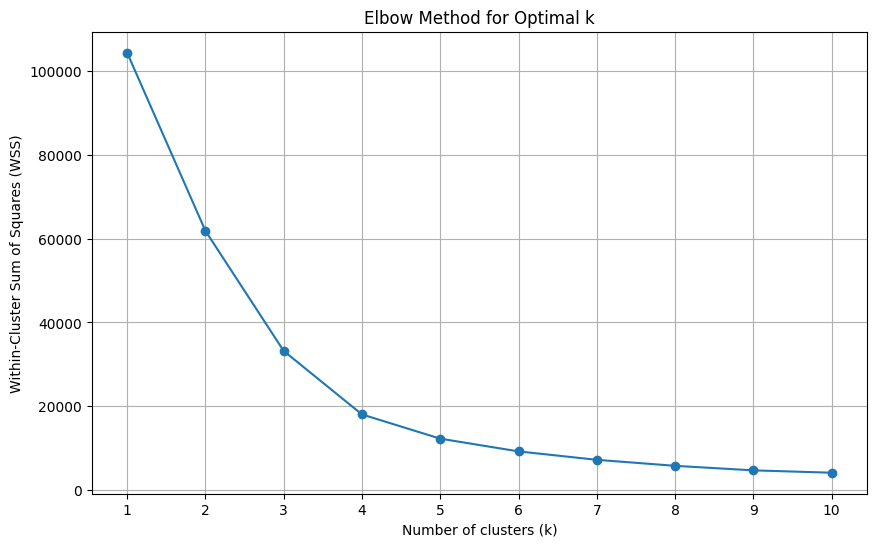

In [792]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


k_values = range(1, 11)  #
wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    kmeans.fit(pca_result2N)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### PCA Kmeans for Mixed 2D


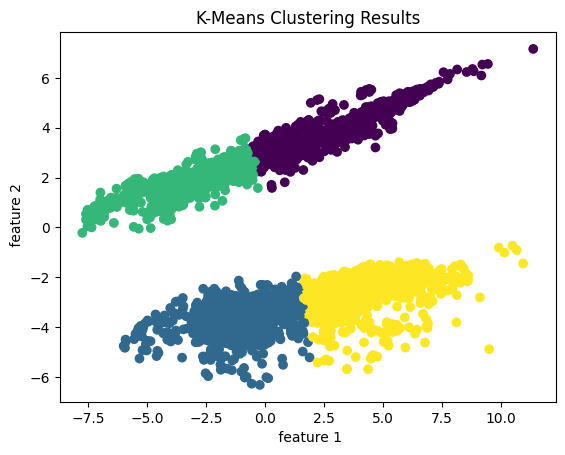

Silhouette Score for 4 clusters: 0.560
             mean    median       std  min       max  count
cluster                                                    
0        0.013008 -0.010012  0.381502 -1.0  1.020295    990
1       -0.029656  0.000000  0.528290 -1.0  1.020295   1157
2       -0.004043  0.000000  0.537942 -1.0  1.020295   1477
3        0.051288  0.031000  0.436366 -1.0  1.020295    867


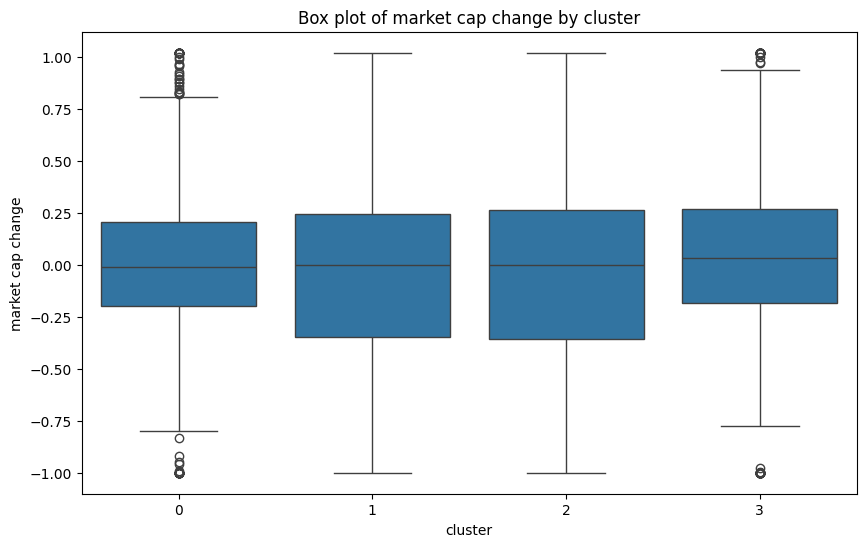

Cluster sizes:
 cluster
0     990
1    1157
2    1477
3     867
dtype: int64


In [793]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result2)

# Plotting the results
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")



final_merged_df['cluster'] = kmeans_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)

# For visualization, let's create box plots for each indicator within each cluster
# This loop generates a box plot for each indicator across clusters
for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()

cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## PCA Kmeans for not mixed 2D

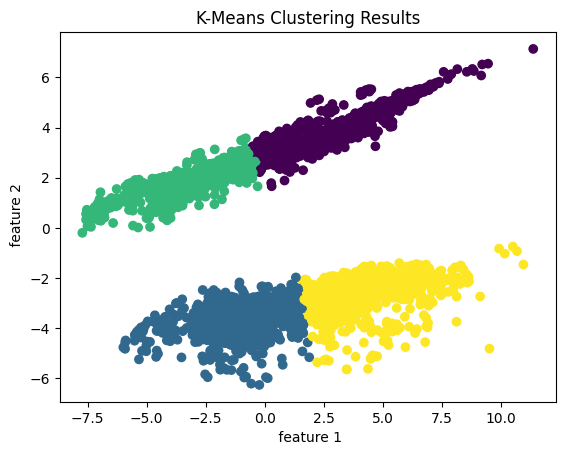

Silhouette Score for 4 clusters: 0.562


In [794]:


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result2N)

plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

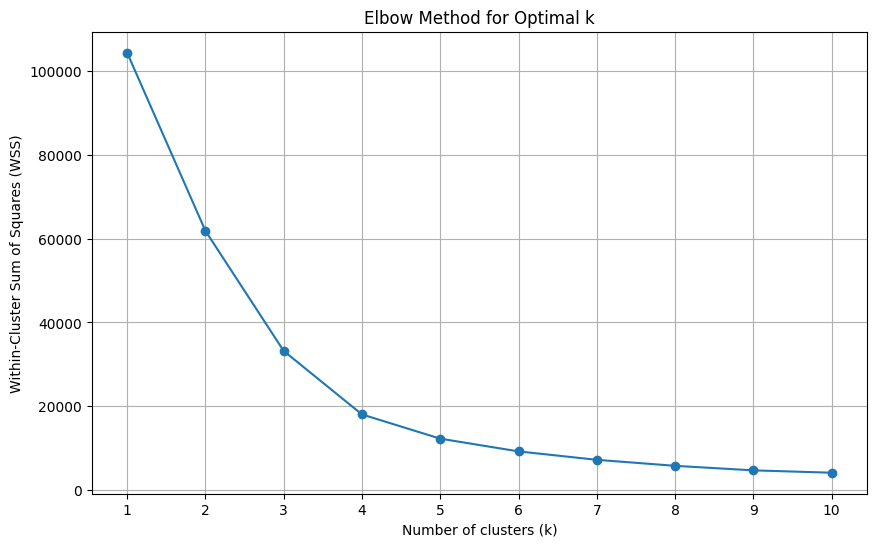

In [795]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


k_values = range(1, 11) 

wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    kmeans.fit(pca_result2N)
    
    wss_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### Labels of what we want

In [796]:


combined_data_df['Predicted_Class'] = kmeans_labels
combined_data_df.head(20)
combined_data_df.columns
combined_data_df.head()

0         1         2         3         4         5         6  \
0  0.138699 -0.149809  1.009015  0.216981 -0.070342  0.146564  0.198258   
1  0.085250 -0.140410  0.594752  0.149242 -0.069129  0.125253  0.198258   
2  0.181570 -0.020153  0.692310  0.275376 -0.059536  0.207018  0.198258   
3  0.293957  0.053426  0.713143 -0.263985 -5.199338  0.306631  0.198258   
4  0.561694  0.689268 -1.241603  0.997920 -0.126744  0.650516  0.198258   

          7         8         9  ...   37   38   39   40   41   42   43   44  \
0 -0.417002 -0.332736 -0.506348  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -0.417002 -1.108181  0.667103  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.417002 -0.994611  0.823099  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.417002 -0.904544  1.047193  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.417002  0.479091  1.256920  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45  Predicted_Class  
0  0.0                2  
1  0.0                2  
2  0.0                1  
3  0.0                1  
4  0.0                3  

[5 rows x 47 columns]

## PCA Kmeans for  mixed 3D

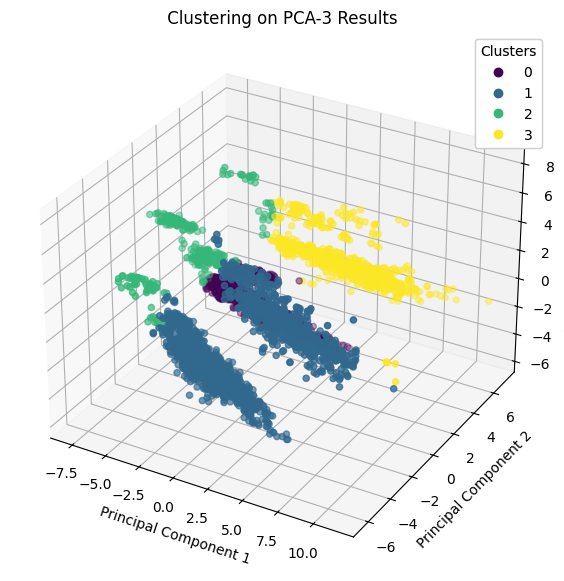

Silhouette Score for 4 clusters: 0.412
             mean    median       std  min       max  count
cluster                                                    
0        0.002741  0.000000  0.486216 -1.0  1.020295   1202
1        0.007436  0.000000  0.487132 -1.0  1.020295   1955
2       -0.010437  0.000000  0.613670 -1.0  1.020295    512
3        0.005563 -0.016692  0.385246 -1.0  1.020295    822


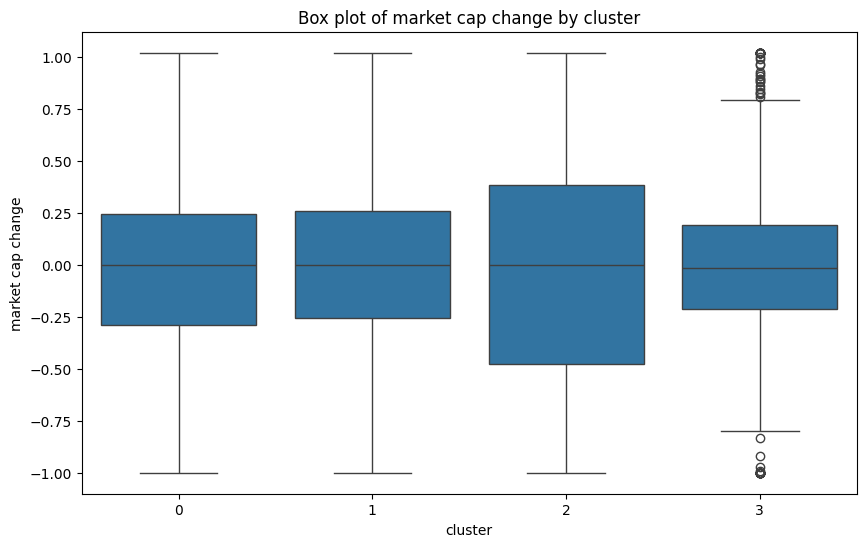

Cluster sizes:
 cluster
0    1202
1    1955
2     512
3     822
dtype: int64


In [797]:

k = 4

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

final_merged_df['cluster'] = kmeans_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)

# For visualization, let's create box plots for each indicator within each cluster
# This loop generates a box plot for each indicator across clusters
for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()

# If you're interested in seeing the distribution of data points in each cluster
cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## PCA K-means for not mixed

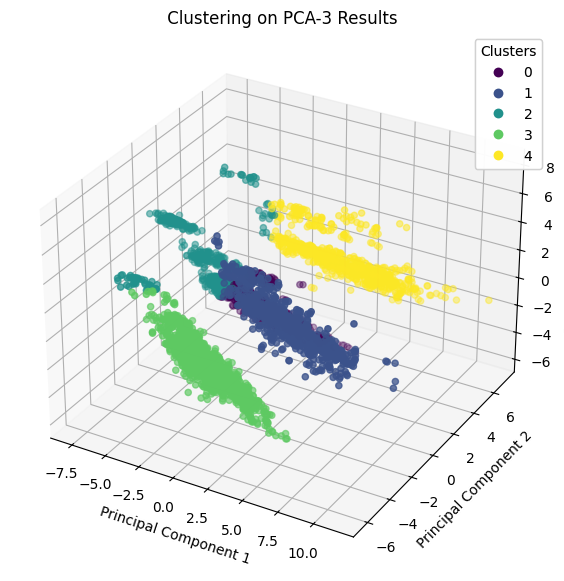

Silhouette Score for 5 clusters: 0.492
             mean    median       std  min       max  count
cluster                                                    
0        0.025841  0.000000  0.431578 -1.0  1.020295    839
1        0.028055  0.000848  0.453224 -1.0  1.020295    815
2       -0.021270  0.000000  0.604641 -1.0  1.020295    852
3       -0.010389  0.000000  0.510368 -1.0  1.020295   1169
4        0.003411 -0.019064  0.386459 -1.0  1.020295    816


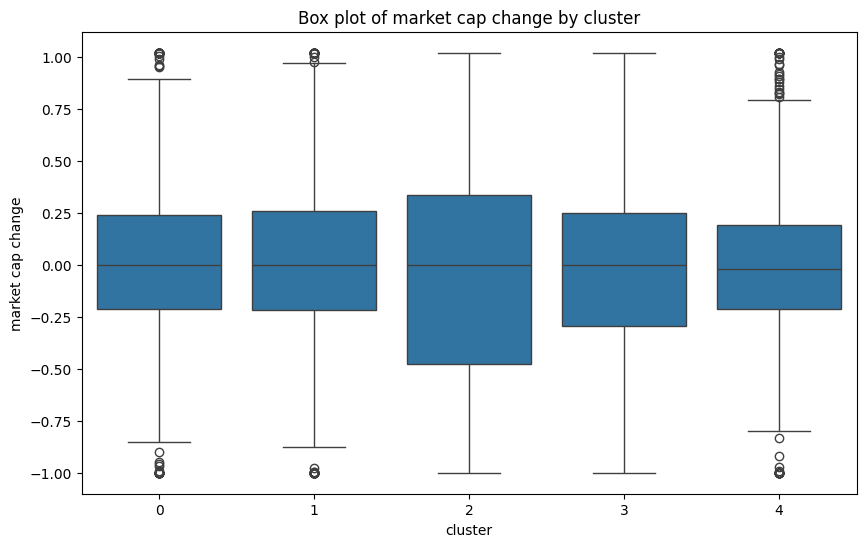

Cluster sizes:
 cluster
0     839
1     815
2     852
3    1169
4     816
dtype: int64


In [798]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")


final_merged_df['cluster'] = kmeans_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()
cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

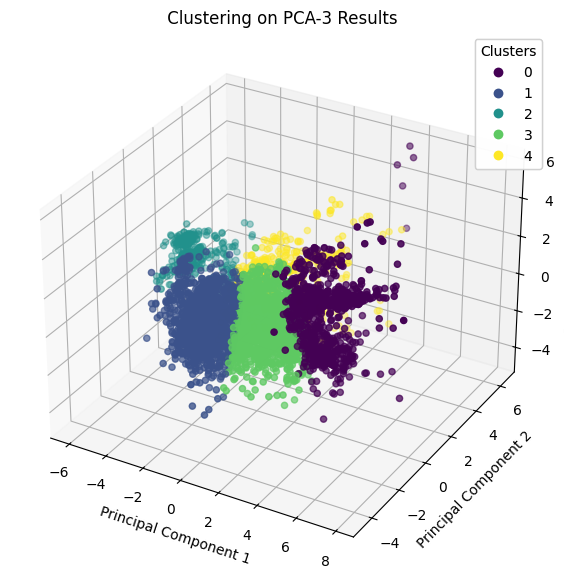

Silhouette Score for 5 clusters: 0.353


In [799]:
k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result3NR)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3NR, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

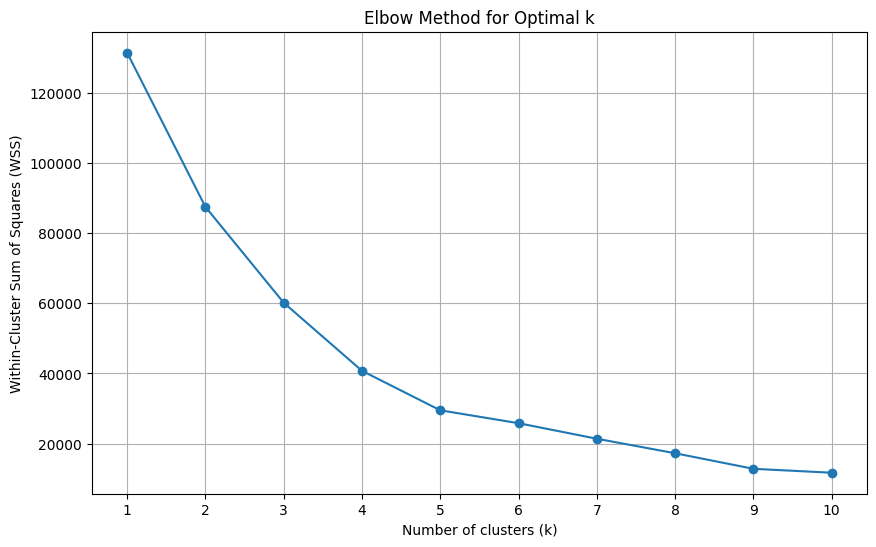

In [800]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


k_values = range(1, 11) 

wss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    kmeans.fit(pca_result3N)
    
    wss_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## EM PCA 2D for mixed

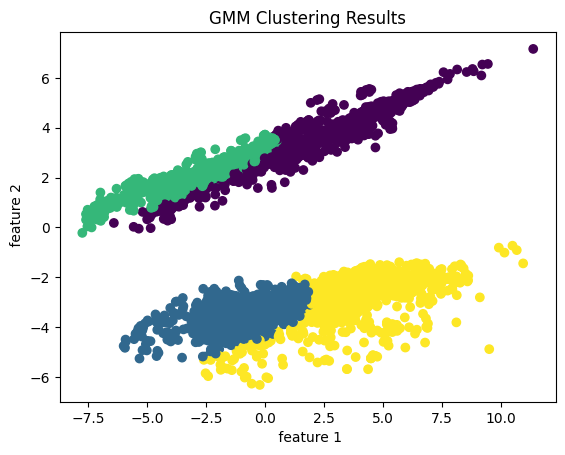

Silhouette Score for 10 clusters: 0.473


In [801]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


n_components = 4

gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result2)

plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, gmm_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## EM PCA 2D for not mixed

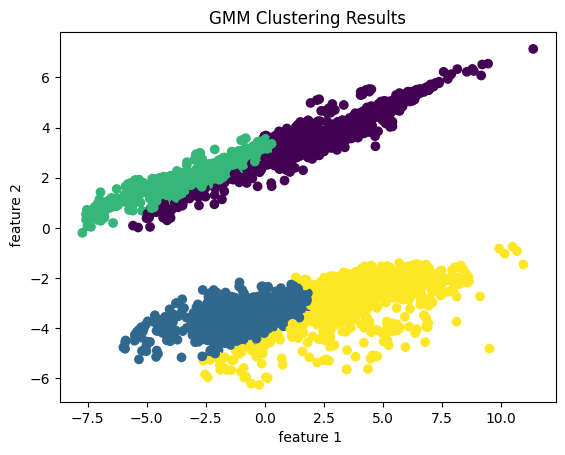

Silhouette Score for 4 clusters: 0.485


In [802]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


n_components = 4

gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result2N)

plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")

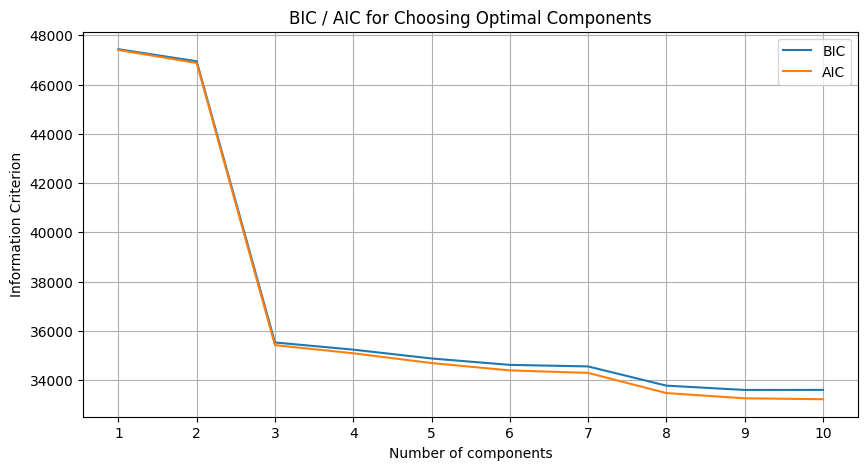

In [803]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(1, 11) 
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_result2N)
    bics.append(gmm.bic(pca_result2N))
    aics.append(gmm.aic(pca_result2N))

# Plotting the BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC / AIC for Choosing Optimal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


## EM PCA 3D for mixed

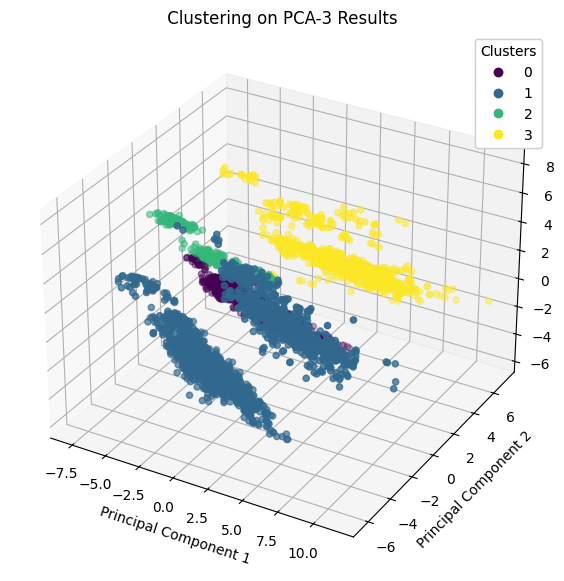

Silhouette Score for 10 clusters: 0.382


In [804]:

n_components = 4 
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result3)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, gmm_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

## EM PCA 3D for not mixed

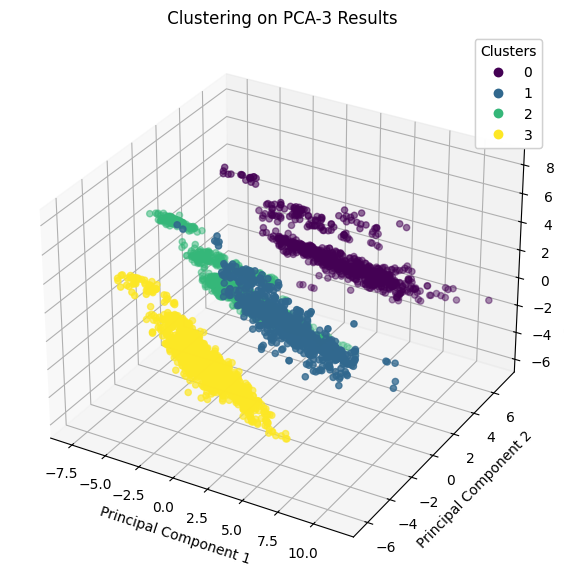

Silhouette Score for 4 clusters: 0.496
             mean    median       std  min       max  count
cluster                                                    
0        0.004746 -0.014644  0.398086 -1.0  1.020295    853
1        0.026762  0.000000  0.454096 -1.0  1.020295    817
2        0.001770  0.000000  0.520038 -1.0  1.020295   1614
3       -0.009702  0.000000  0.516611 -1.0  1.020295   1207


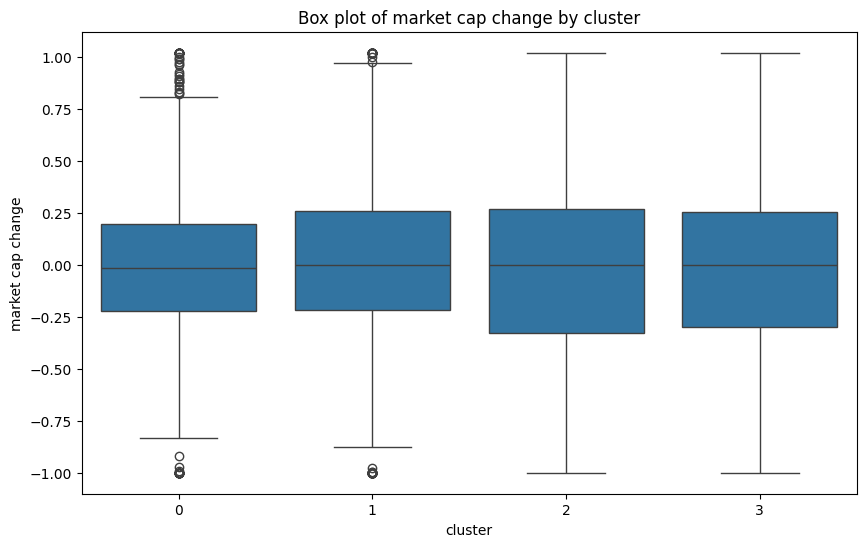

Cluster sizes:
 cluster
0     853
1     817
2    1614
3    1207
dtype: int64


In [805]:

n_components = 4


gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result3N)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)


ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')


legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, gmm_labels)

print(f"Silhouette Score for {n_components} clusters: {silhouette_avg:.3f}")


final_merged_df['cluster'] = gmm_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()
cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## Find best N for EM 

## Hierarchical PCA 2D for mixed

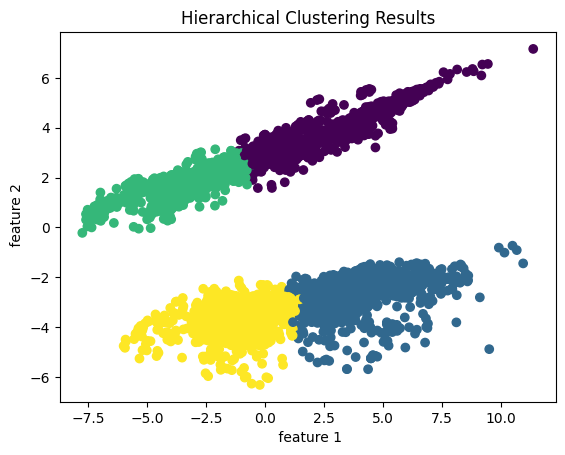

Silhouette Score for 10 clusters: 0.555
             mean    median       std  min       max  count
cluster                                                    
0        0.010538 -0.007140  0.383968 -1.0  1.020295   1088
1        0.044768  0.019232  0.441719 -1.0  1.020295    929
2       -0.003307  0.000000  0.546043 -1.0  1.020295   1379
3       -0.028708  0.000000  0.529733 -1.0  1.020295   1095


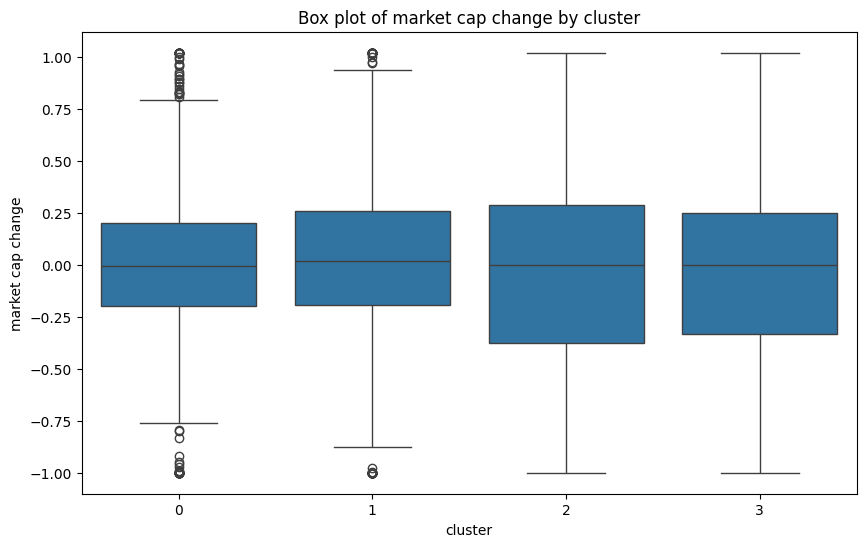

Cluster sizes:
 cluster
0    1088
1     929
2    1379
3    1095
dtype: int64


In [806]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(pca_result2)


plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2, hierarchical_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")


final_merged_df['cluster'] = hierarchical_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## Hierarchical PCA 2D for not mixed

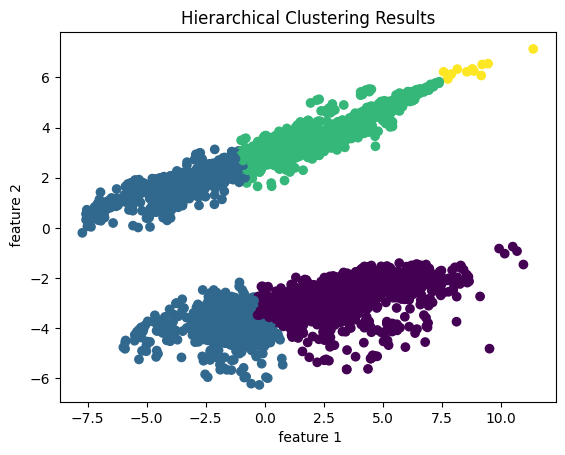

Silhouette Score for clusters: 0.396
             mean    median       std       min       max  count
cluster                                                         
0        0.053016  0.018674  0.436908 -1.000000  1.020295   1197
1       -0.026769  0.000000  0.551794 -1.000000  1.020295   2179
2        0.010575 -0.008905  0.386930 -1.000000  1.020295   1103
3        0.022068  0.034826  0.232519 -0.392194  0.320519     12


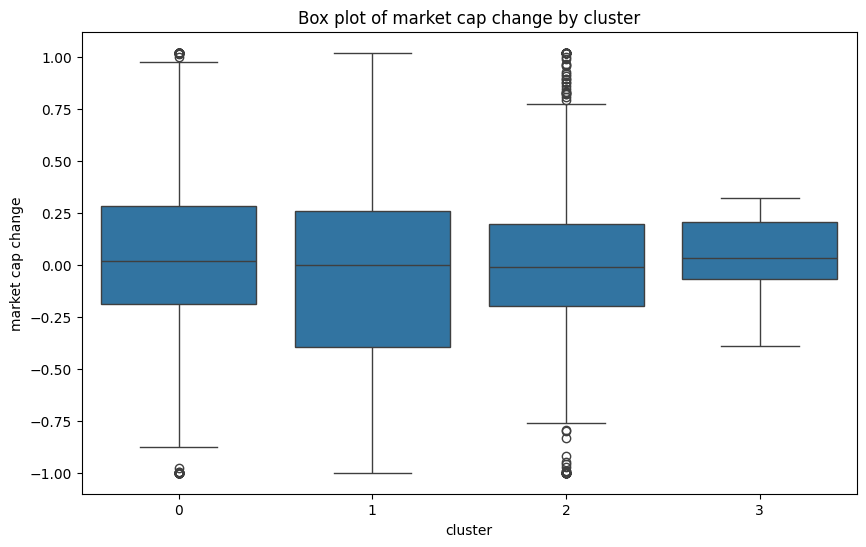

Cluster sizes:
 cluster
0    1197
1    2179
2    1103
3      12
dtype: int64


In [807]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt


hierarchical = AgglomerativeClustering(n_clusters=4, linkage='complete')
hierarchical_labels = hierarchical.fit_predict(pca_result2N)

plt.scatter(pca_result2N[:, 0], pca_result2N[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result2N, hierarchical_labels)

print(f"Silhouette Score for clusters: {silhouette_avg:.3f}")



final_merged_df['cluster'] = hierarchical_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

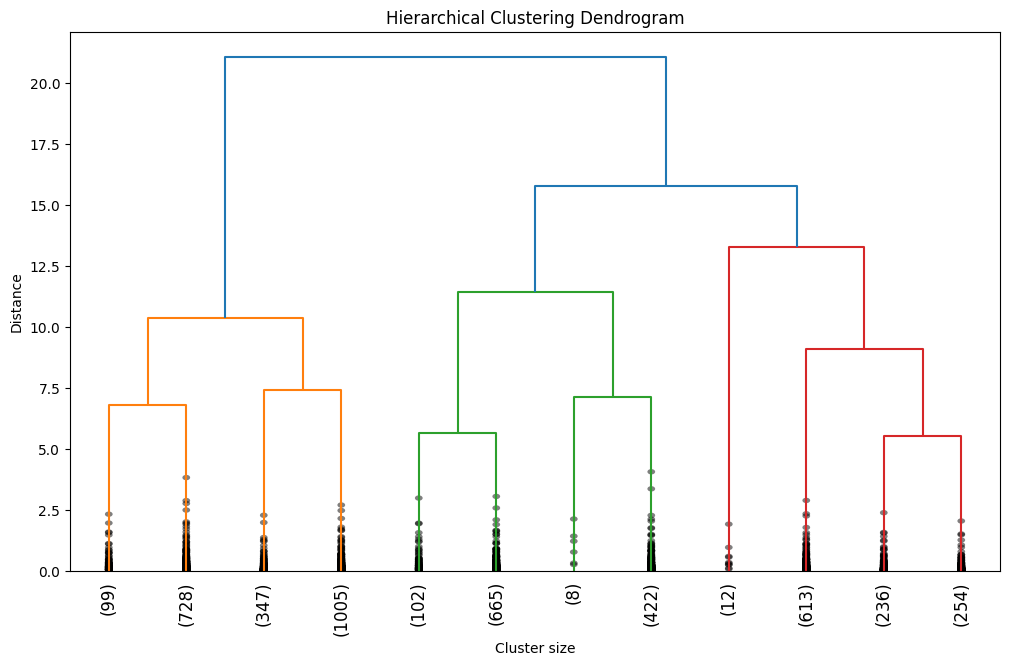

In [808]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


Z = linkage(pca_result2N, 'complete')


plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')


plt.axhline(y=25, color='r', linestyle='--')  

plt.show()


## Hierarchical PCA 3D for mixed

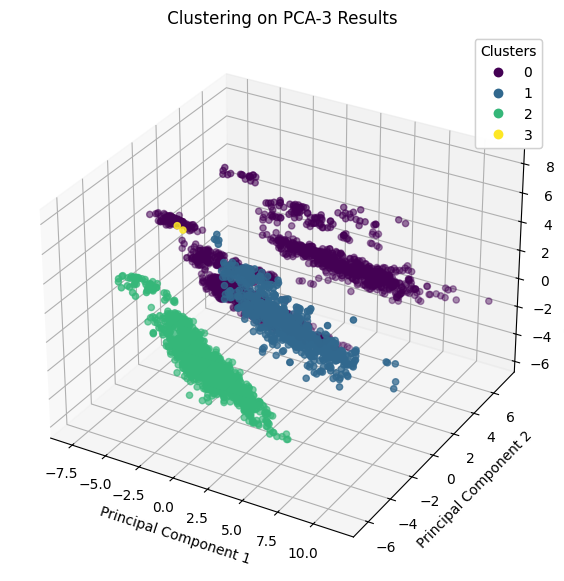

Silhouette Score for 10 clusters: 0.342
             mean    median       std  min       max  count
cluster                                                    
0        0.002799 -0.000889  0.481298 -1.0  1.020295   2467
1        0.028055  0.000848  0.453224 -1.0  1.020295    815
2       -0.009702  0.000000  0.516611 -1.0  1.020295   1207
3       -0.500000 -0.500000  0.707107 -1.0  0.000000      2


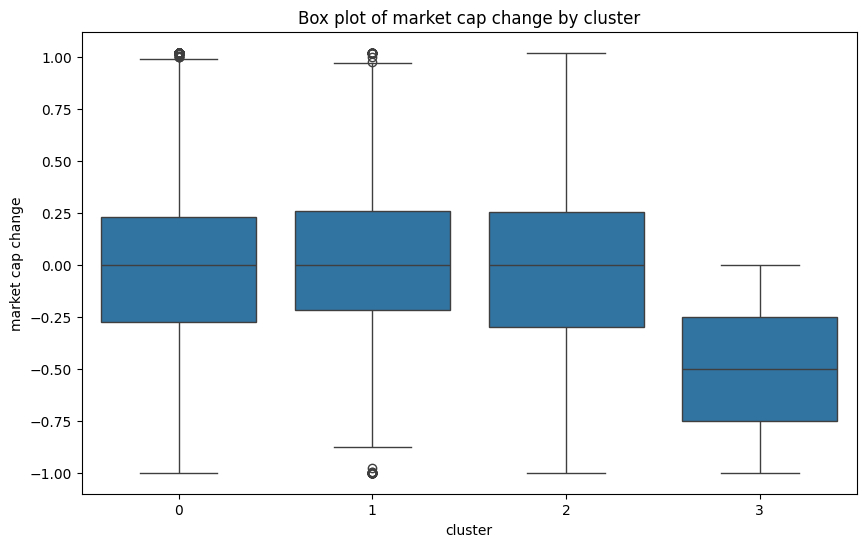

Cluster sizes:
 cluster
0    2467
1     815
2    1207
3       2
dtype: int64


In [809]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='single') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3[:, 0], pca_result3[:, 1], pca_result3[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3, hierarchical_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

final_merged_df['cluster'] = hierarchical_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## Hierarchical PCA 3D for Not mixed

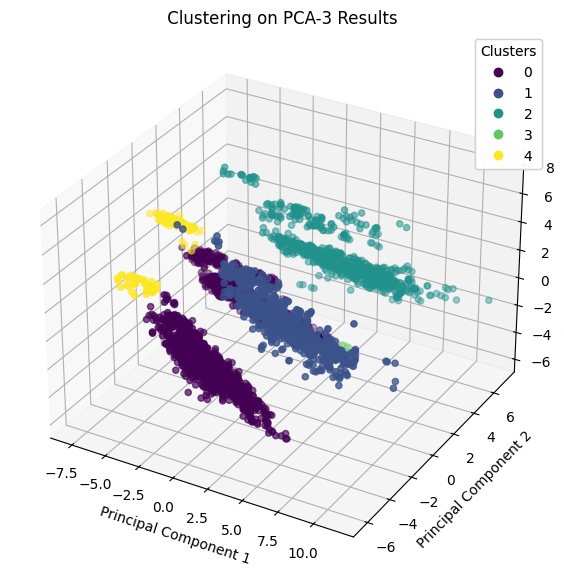

Silhouette Score for  clusters: 0.327


In [810]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='average') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3N[:, 0], pca_result3N[:, 1], pca_result3N[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3N, hierarchical_labels)

print(f"Silhouette Score for  clusters: {silhouette_avg:.3f}")

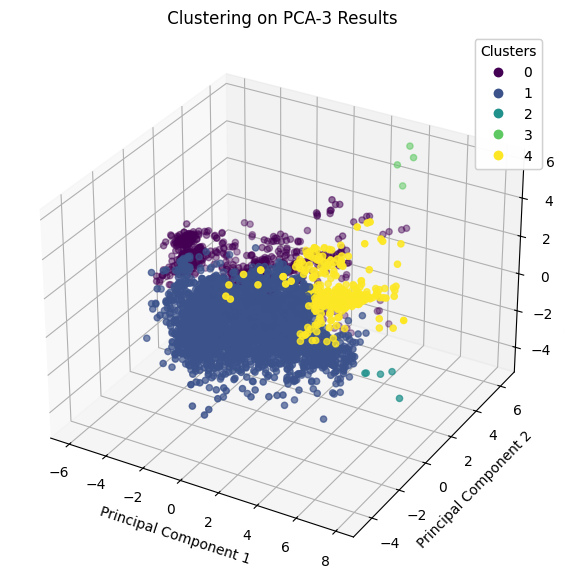

Silhouette Score for  clusters: 0.298
             mean    median       std       min       max  count
cluster                                                         
0        0.002689  0.000000  0.495355 -1.000000  1.020295    863
1        0.001814  0.000000  0.498745 -1.000000  1.020295   3283
2        0.042458  0.099829  0.326286 -0.290311  0.438692      5
3        0.125428  0.221721  0.206675 -0.184162  0.242430      4
4        0.024021 -0.020697  0.315526 -1.000000  1.020295    336


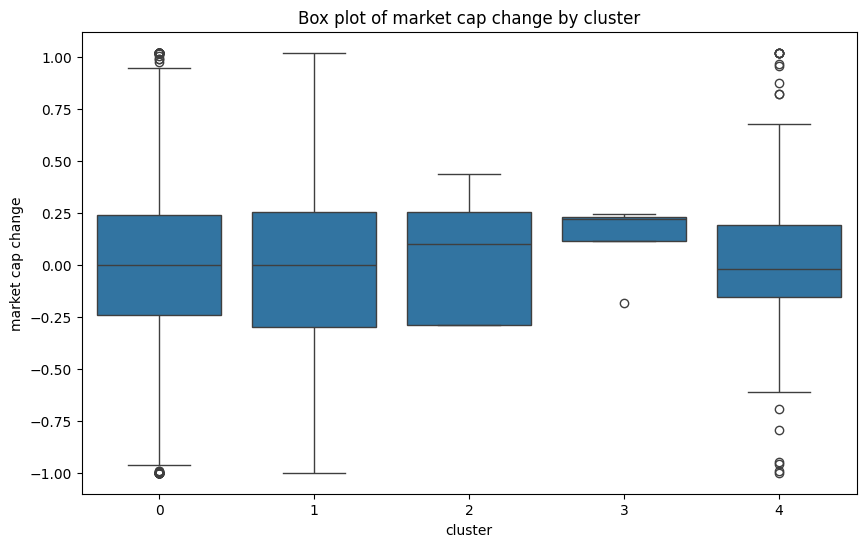

Cluster sizes:
 cluster
0     863
1    3283
2       5
3       4
4     336
dtype: int64


In [811]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='average') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result3NR)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result3NR[:, 0], pca_result3NR[:, 1], pca_result3NR[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
silhouette_avg = silhouette_score(pca_result3NR, hierarchical_labels)

print(f"Silhouette Score for  clusters: {silhouette_avg:.3f}")


final_merged_df['cluster'] = hierarchical_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# View the extended statistics
print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

## Dendrogram For finding best n

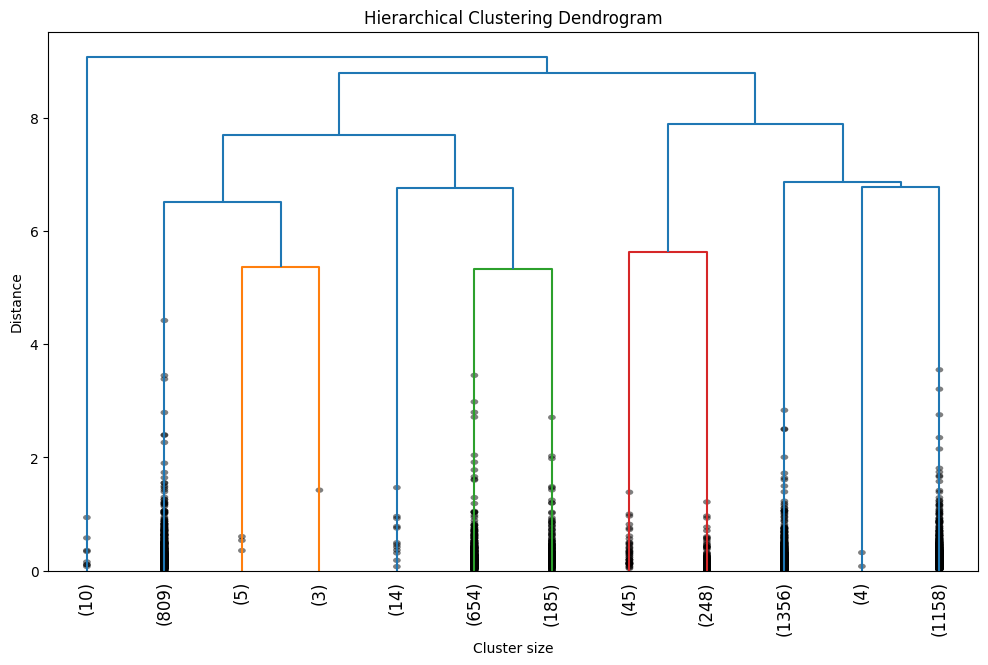

In [812]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your dataset after dimensionality reduction
# Generate the linkage matrix using Ward's method
Z = linkage(pca_result3N, 'average')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# This line draws a threshold line to help identify the number of clusters
plt.axhline(y=25, color='r', linestyle='--')  # Adjust 'y' based on your dendrogram

plt.show()


### Model


### Second Approach 

In [813]:
money_columns = [
    'net_income', 'ebitda', 'shareholders_equity.treasury_stock'
]

# Ratio columns typically involve percentages or ratios
ratio_columns = [
    'Debt to Equity Ratio', 'Profit Margin', 'Return On Equity', 'Return On Assets',
    'market cap change'
]



other_columns = [
    'eps_basic', 'basic_shares_outstanding'
]

idinc_columns = ['Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']




categorical_columns = [ 'sector', 'Industry_Category']


numric_df=final_merged_df[money_columns]
Ratio_df= final_merged_df[idinc_columns]
Categorical_df= final_merged_df[categorical_columns] 
other_col_df = final_merged_df[other_columns]


In [814]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
df_categorical_encoded_sparse = onehot.fit_transform(Categorical_df)

# To get a dense array
df_categorical_encoded = df_categorical_encoded_sparse.toarray()

In [815]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np



def custom_normalize_row(row):
    max_abs_value = np.max(np.abs(row))
    if max_abs_value == 0:
        return row
    else:
        return row / max_abs_value

# Apply the custom row-wise normalization to each DataFrame
monetary_df_scaled_row = numric_df.apply(custom_normalize_row, axis=1)
ratios_df_scaled_row = Ratio_df.apply(custom_normalize_row, axis=1)



qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)

X_transformed = qt.fit_transform(other_col_df)
X_transformed_nm  = qt.fit_transform(monetary_df_scaled_row)
X_transformed_Indicators = qt.fit_transform(ratios_df_scaled_row)

In [816]:

combined_data = np.concatenate([X_transformed,X_transformed_nm, X_transformed_Indicators,df_categorical_encoded], axis=1)


combined_data_df = pd.DataFrame(combined_data)
combined_data_df.head(20)


0         1         2         3         4         5         6   \
0   0.216981 -0.070342  0.837808  5.199338 -5.199338 -0.914680  1.007365   
1   0.149242 -0.069129  0.625489  5.199338 -5.199338 -0.217612  1.144803   
2   0.275376 -0.059536  0.691928  5.199338 -5.199338 -0.190558  0.961580   
3  -0.263985 -5.199338  0.760378  5.199338 -5.199338 -0.424055  0.960645   
4   0.997920 -0.126744  0.125861  0.045717  5.199338  5.199338  0.083826   
5   1.128735 -0.169435 -0.002000 -0.016082  5.199338  5.199338  0.058735   
6   1.067095 -0.204512 -0.126323 -0.076491  5.199338  5.199338 -0.047164   
7   0.630254  2.577748  0.861474  5.199338 -5.199338  5.199338  0.313930   
8   0.871283  2.549852  0.968056  5.199338 -5.199338  5.199338  0.336256   
9   0.919282  2.529775  0.937953  5.199338 -5.199338  5.199338  0.274971   
10  0.920808  2.511200  0.942067  5.199338 -5.199338  5.199338  0.362395   
11  0.365171  1.177965  0.127059  5.199338  1.126809  5.199338  0.771490   
12  0.981540  1.175092  0.581682  5.199338  0.886294 -0.116944  5.199338   
13  0.686350  1.169597  0.256672  5.199338  1.012097  5.199338  0.899505   
14 -0.020937  1.169342 -0.167730  5.199338  1.116822  5.199338  0.296748   
15  0.539873  1.335742  0.100332  5.199338  0.774894  5.199338 -0.161159   
16  0.951584  1.359391  0.349142  5.199338  0.724538  5.199338  0.003188   
17  0.966351  1.360067  0.384533  5.199338  0.794572  5.199338  0.076596   
18  0.542776  1.356813  0.001017  5.199338  0.954517  5.199338 -0.157446   
19  1.270206 -0.800422 -0.032947 -0.039334  5.199338  5.199338 -0.174499   

          7         8    9   ...   23   24   25   26   27   28   29   30   31  \
0   5.199338  2.212415  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   5.199338  2.035009  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   5.199338  1.933843  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   5.199338  2.208972  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.252275  0.449840  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.319440  0.441168  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.160073  0.327899  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.950156  0.714208  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   1.214899  0.809947  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   1.287404  0.757917  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  1.339852  0.850101  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.487080  0.889172  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
12  1.379727  1.720999  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
13  0.821142  1.075038  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
14 -0.053639  0.483418  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
15 -0.167795  0.081636  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16  0.207498  0.207753  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  0.334329  0.268534  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18 -0.044363  0.099171  0.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19  0.055914  0.296122  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     32  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  
6   0.0  
7   1.0  
8   1.0  
9   1.0  
10  1.0  
11  0.0  
12  0.0  
13  0.0  
14  0.0  
15  0.0  
16  0.0  
17  0.0  
18  0.0  
19  0.0  

[20 rows x 33 columns]

In [817]:
combined_data_Without_Categorical = np.concatenate([X_transformed,X_transformed_nm,X_transformed_Indicators], axis=1)


# Convert the concatenated array to a DataFrame
combined_data_df_Without_Categorical = pd.DataFrame(combined_data_Without_Categorical)
combined_data_df_Without_Categorical.head(20)


0         1         2         3         4         5         6  \
0   0.216981 -0.070342  0.837808  5.199338 -5.199338 -0.914680  1.007365   
1   0.149242 -0.069129  0.625489  5.199338 -5.199338 -0.217612  1.144803   
2   0.275376 -0.059536  0.691928  5.199338 -5.199338 -0.190558  0.961580   
3  -0.263985 -5.199338  0.760378  5.199338 -5.199338 -0.424055  0.960645   
4   0.997920 -0.126744  0.125861  0.045717  5.199338  5.199338  0.083826   
5   1.128735 -0.169435 -0.002000 -0.016082  5.199338  5.199338  0.058735   
6   1.067095 -0.204512 -0.126323 -0.076491  5.199338  5.199338 -0.047164   
7   0.630254  2.577748  0.861474  5.199338 -5.199338  5.199338  0.313930   
8   0.871283  2.549852  0.968056  5.199338 -5.199338  5.199338  0.336256   
9   0.919282  2.529775  0.937953  5.199338 -5.199338  5.199338  0.274971   
10  0.920808  2.511200  0.942067  5.199338 -5.199338  5.199338  0.362395   
11  0.365171  1.177965  0.127059  5.199338  1.126809  5.199338  0.771490   
12  0.981540  1.175092  0.581682  5.199338  0.886294 -0.116944  5.199338   
13  0.686350  1.169597  0.256672  5.199338  1.012097  5.199338  0.899505   
14 -0.020937  1.169342 -0.167730  5.199338  1.116822  5.199338  0.296748   
15  0.539873  1.335742  0.100332  5.199338  0.774894  5.199338 -0.161159   
16  0.951584  1.359391  0.349142  5.199338  0.724538  5.199338  0.003188   
17  0.966351  1.360067  0.384533  5.199338  0.794572  5.199338  0.076596   
18  0.542776  1.356813  0.001017  5.199338  0.954517  5.199338 -0.157446   
19  1.270206 -0.800422 -0.032947 -0.039334  5.199338  5.199338 -0.174499   

           7         8  
0   5.199338  2.212415  
1   5.199338  2.035009  
2   5.199338  1.933843  
3   5.199338  2.208972  
4   0.252275  0.449840  
5   0.319440  0.441168  
6   0.160073  0.327899  
7   0.950156  0.714208  
8   1.214899  0.809947  
9   1.287404  0.757917  
10  1.339852  0.850101  
11  0.487080  0.889172  
12  1.379727  1.720999  
13  0.821142  1.075038  
14 -0.053639  0.483418  
15 -0.167795  0.081636  
16  0.207498  0.207753  
17  0.334329  0.268534  
18 -0.044363  0.099171  
19  0.055914  0.296122

normalize the market cap change for better visualization

In [818]:
def cap_outliers(df, columns):
    


    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        
    return df


final_merged_df = cap_outliers(final_merged_df, ["market cap change"])

## DBSCAN NO PCA mixed data cut columns

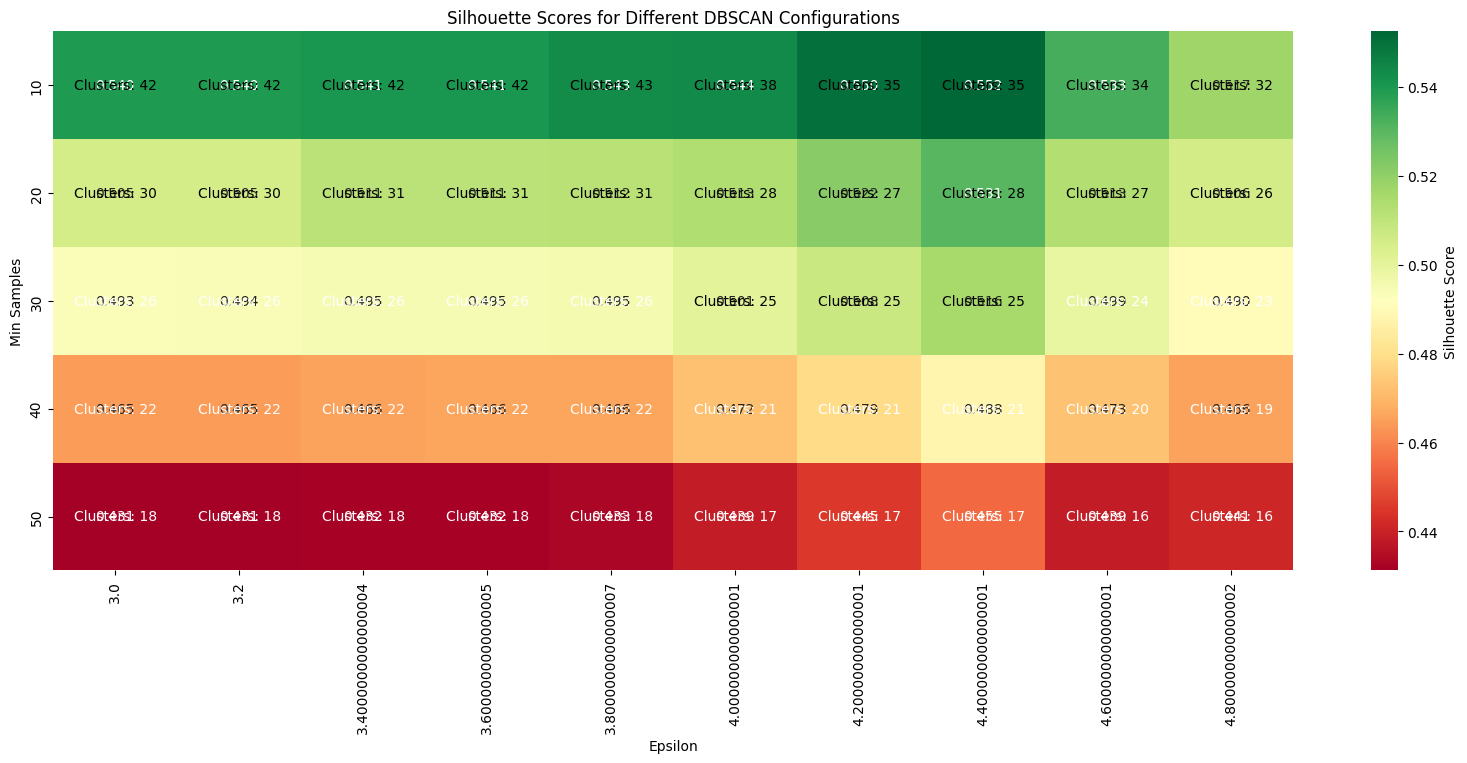

In [819]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Define a range of epsilon values to test
eps_values = np.arange(3.0, 5.0, 0.2)  

# Define a range of min_samples values to test
min_samples_values = range(10, 51, 10) 


results = []

for eps_val in eps_values:
    for min_samples_val in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan_labels = dbscan.fit_predict(combined_data)
        
        # Count clusters (excluding noise, labeled as -1)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        # Calculate silhouette score if more than 1 cluster is found, excluding noise
        if n_clusters > 1:
            silhouette_avg = silhouette_score(combined_data, dbscan_labels)
            results.append((eps_val, min_samples_val, silhouette_avg, n_clusters))
        else:
            results.append((eps_val, min_samples_val, None, n_clusters))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score', 'n_clusters'])

# Create a pivot table for silhouette scores
pivot_silhouette = results_df.pivot(index='min_samples', columns='eps', values='silhouette_score')

# Create a pivot table for the number of clusters
pivot_n_clusters = results_df.pivot(index='min_samples', columns='eps', values='n_clusters')

# Plotting the silhouette scores
plt.figure(figsize=(20, 7))
sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="RdYlGn", cbar_kws={'label': 'Silhouette Score'})
plt.title('Silhouette Scores for Different DBSCAN Configurations')
plt.xlabel('Epsilon')
plt.ylabel('Min Samples')

# Overlay the number of clusters on the same heatmap
for y in range(pivot_n_clusters.shape[0]):
    for x in range(pivot_n_clusters.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'Clusters: {pivot_n_clusters.iloc[y, x]}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black' if pivot_silhouette.iloc[y, x] > 0.5 else 'white')

plt.show()


Silhouette Score for DBSCAN: 0.552
             mean    median       std       min       max  count
cluster                                                         
-1      -0.214803 -0.260772  0.580059 -1.000000  1.020295    129
 0      -0.014157  0.000000  0.478798 -1.000000  1.020295    101
 1      -0.009327  0.000821  0.399460 -1.000000  1.020295    358
 2       0.035364  0.000000  0.437743 -1.000000  1.020295    877
 3       0.043734  0.000000  0.393356 -1.000000  1.020295    647
 4       0.037985  0.000000  0.411581 -0.693920  1.020295     57
 5      -0.017339  0.000000  0.577796 -1.000000  1.020295    348
 6       0.109431  0.029949  0.343248 -0.463238  1.020295     24
 7       0.085365  0.136007  0.423882 -1.000000  0.976785     32
 8      -0.029172 -0.036982  0.600123 -1.000000  1.020295    290
 9      -0.205040 -0.330286  0.540285 -1.000000  1.020295     58
 10      0.001811  0.000000  0.471337 -1.000000  1.020295     34
 11      0.197042  0.098693  0.414265 -0.491081  1.0202

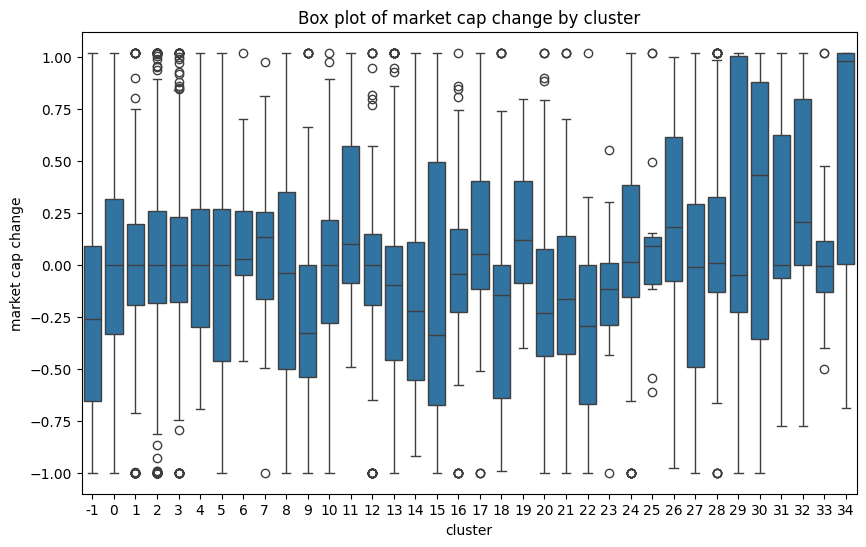

Cluster sizes:
 cluster
-1     129
 0     101
 1     358
 2     877
 3     647
 4      57
 5     348
 6      24
 7      32
 8     290
 9      58
 10     34
 11     81
 12    197
 13    183
 14     45
 15     76
 16    124
 17     45
 18     47
 19     38
 20     69
 21     45
 22     13
 23     20
 24    132
 25     16
 26     18
 27    104
 28    171
 29     14
 30     11
 31     10
 32     25
 33     33
 34     19
dtype: int64


In [820]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

eps_optimal = 4.4

# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=10)
dbscan_labels = dbscan.fit_predict(combined_data) 



silhouette_avg_dbscan = silhouette_score(combined_data, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

final_merged_df['cluster'] = dbscan_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)


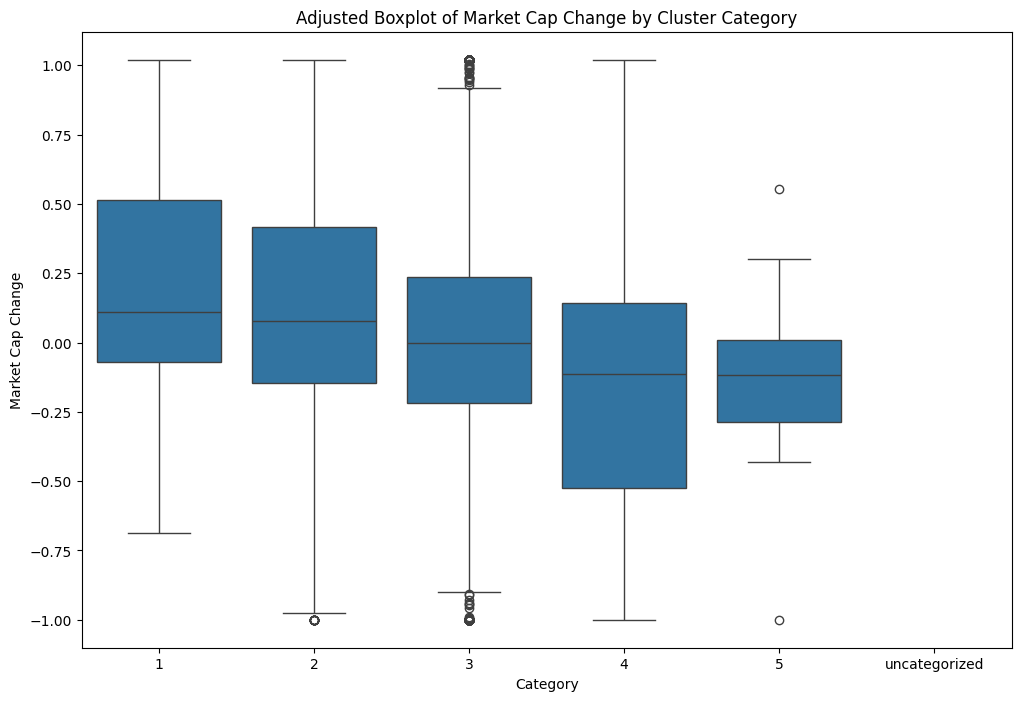

In [821]:
positive_threshold = 0.1
negative_threshold = -0.1


cluster_stats = final_merged_df.groupby('cluster')['market cap change'].agg(['median', 'min', 'max', 
                                                                             ('25%', lambda x: x.quantile(0.25)), 
                                                                             ('75%', lambda x: x.quantile(0.75))])


cluster_stats.columns = ['median', 'min', 'max', '25%', '75%']



def classify_cluster_adjusted(row):
    if row['median'] > positive_threshold and row['75%'] > positive_threshold:
        category = 1
    elif row['median'] < negative_threshold and row['25%'] < negative_threshold:
        category = 5
    elif row['25%'] <= 0 and row['75%'] >= 0:
        category = 3
    elif row['median'] <= positive_threshold and row['median'] > 0:
        category = 2
    elif row['median'] >= negative_threshold and row['median'] < 0:
        category = 4
    else:
        category = 'Uncategorized'
    
    # Adjusting categories based on new criteria
    if category == 1 and row['min'] < -0.75:
        category = 2  # Move to category 2 if initially 1 but min falls below -0.75
    elif category == 5 and row['max'] > 0.75:
        category = 4  # Move to category 4 if initially 5 but max falls above 0.75
    
    return category

# Re-apply the adjusted classification
cluster_stats['Category'] = cluster_stats.apply(classify_cluster_adjusted, axis=1)

# Merge the adjusted classification back to the main DataFrame

final_merged_df1 = final_merged_df.merge(cluster_stats['Category'], left_on='cluster', right_index=True, how='left')

# Re-plot the boxplot with adjusted categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='market cap change', data=final_merged_df1, order=['1', '2', '3', '4', '5','uncategorized'])
plt.title('Adjusted Boxplot of Market Cap Change by Cluster Category')
plt.xlabel('Category')
plt.ylabel('Market Cap Change')
plt.show()


## dbscan for not mixed

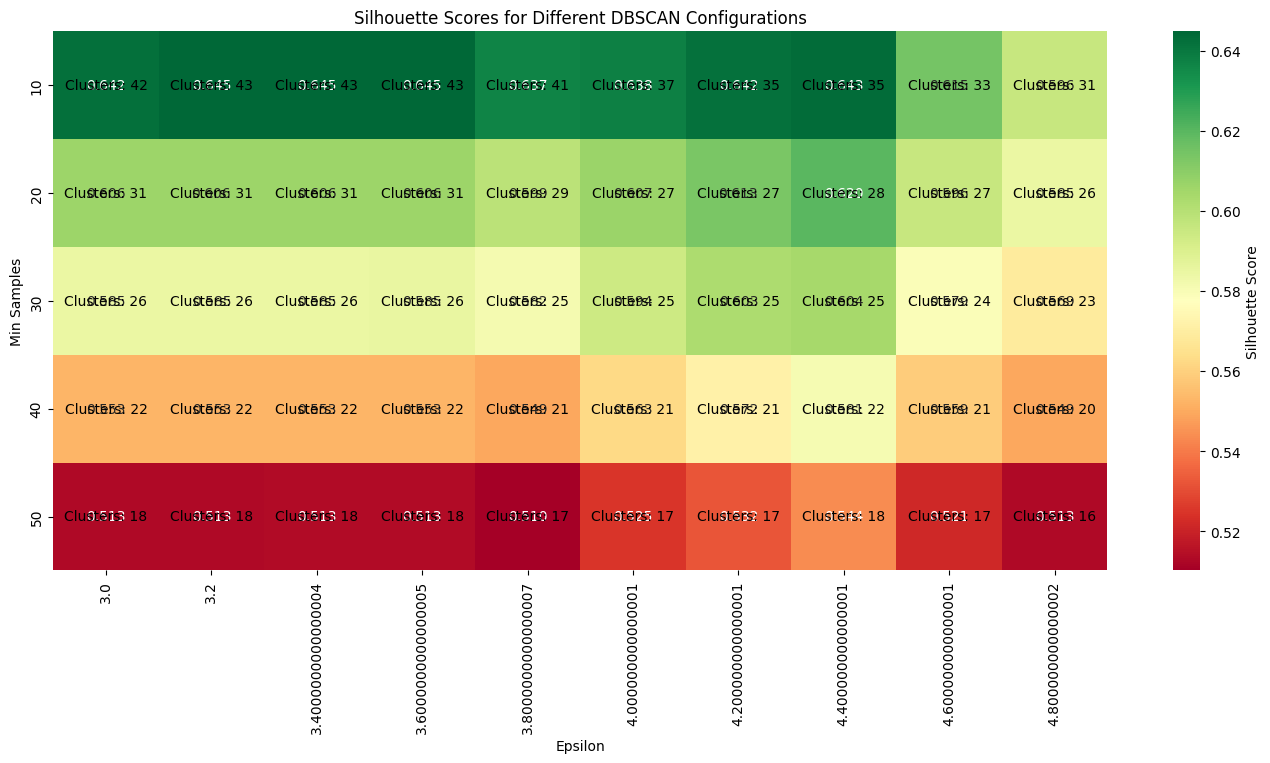

In [822]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

eps_values = np.arange(3.0, 5.0, 0.2) 


min_samples_values = range(10, 51, 10)  


results = []

for eps_val in eps_values:
    for min_samples_val in min_samples_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        dbscan_labels = dbscan.fit_predict(combined_data_Without_Categorical)
        
        # Count clusters (excluding noise, labeled as -1)
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        
        # Calculate silhouette score if more than 1 cluster is found, excluding noise
        if n_clusters > 1:
            silhouette_avg = silhouette_score(combined_data_Without_Categorical, dbscan_labels)
            results.append((eps_val, min_samples_val, silhouette_avg, n_clusters))
        else:
            results.append((eps_val, min_samples_val, None, n_clusters))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score', 'n_clusters'])

# Create a pivot table for silhouette scores
pivot_silhouette = results_df.pivot(index='min_samples', columns='eps', values='silhouette_score')

# Create a pivot table for the number of clusters
pivot_n_clusters = results_df.pivot(index='min_samples', columns='eps', values='n_clusters')

# Plotting the silhouette scores
plt.figure(figsize=(17, 7))
sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="RdYlGn", cbar_kws={'label': 'Silhouette Score'})
plt.title('Silhouette Scores for Different DBSCAN Configurations')
plt.xlabel('Epsilon')
plt.ylabel('Min Samples')

# Overlay the number of clusters on the same heatmap
for y in range(pivot_n_clusters.shape[0]):
    for x in range(pivot_n_clusters.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'Clusters: {pivot_n_clusters.iloc[y, x]}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='black' if pivot_silhouette.iloc[y, x] > 0.5 else 'white')

plt.show()


Silhouette Score for DBSCAN: 0.645
             mean    median       std       min       max  count
cluster                                                         
-1      -0.303449 -0.377726  0.627227 -1.000000  1.020295    190
 0       0.027054  0.000000  0.448110 -0.958550  1.020295     95
 1       0.049883  0.024489  0.329555 -0.998727  1.020295    334
 2       0.077701  0.001927  0.395549 -1.000000  1.020295    825
 3       0.067457  0.000000  0.367052 -1.000000  1.020295    627
 4       0.037985  0.000000  0.411581 -0.693920  1.020295     57
 5       0.009346  0.000000  0.568218 -0.942500  1.020295    328
 6       0.109431  0.029949  0.343248 -0.463238  1.020295     24
 7      -0.004537 -0.003922  0.584974 -1.000000  1.020295    277
 8      -0.198042 -0.331284  0.542969 -0.998285  1.020295     55
 9       0.032169  0.000000  0.443607 -0.796477  1.020295     33
 10     -0.500000 -0.500000  0.514496 -1.000000  0.000000     18
 11      0.197042  0.098693  0.414265 -0.491081  1.0202

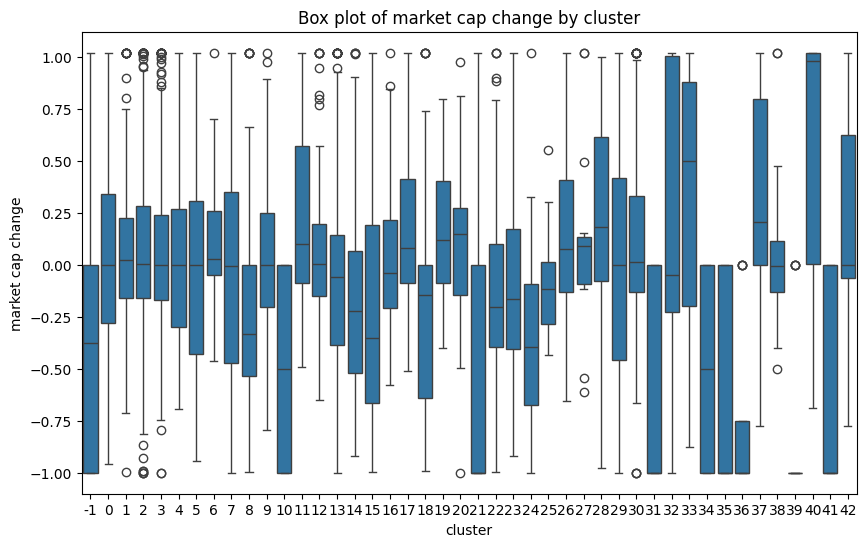

Cluster sizes:
 cluster
-1     190
 0      95
 1     334
 2     825
 3     627
 4      57
 5     328
 6      24
 7     277
 8      55
 9      33
 10     18
 11     81
 12    169
 13    166
 14     43
 15     66
 16    113
 17     41
 18     47
 19     38
 20     31
 21     52
 22     63
 23     43
 24     12
 25     18
 26    119
 27     16
 28     18
 29     99
 30    170
 31     20
 32     14
 33     10
 34     28
 35     13
 36     16
 37     25
 38     33
 39     24
 40     19
 41     11
 42     10
dtype: int64


In [823]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np


eps_optimal = 3.2


dbscan = DBSCAN(eps=eps_optimal, min_samples=10)
dbscan_labels = dbscan.fit_predict(combined_data_Without_Categorical)  




silhouette_avg_dbscan = silhouette_score(combined_data_Without_Categorical, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

final_merged_df['cluster'] = dbscan_labels
cluster_stats = final_merged_df.groupby('cluster')["market cap change"].agg(['mean', 'median', 'std', 'min', 'max', 'count'])


print(cluster_stats)


for indicator in ["market cap change"]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=indicator, data=final_merged_df)
    plt.title(f'Box plot of {indicator} by cluster')
    plt.show()


cluster_size = final_merged_df.groupby('cluster').size()
print("Cluster sizes:\n", cluster_size)

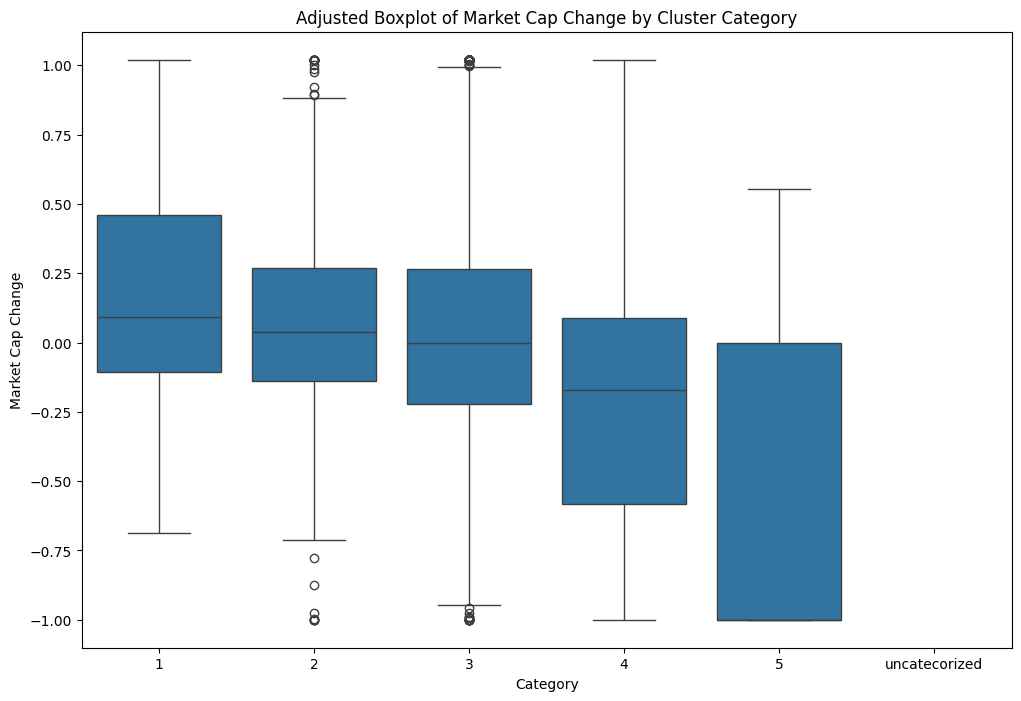

In [824]:
positive_threshold = 0.01
negative_threshold = -0.01


cluster_stats = final_merged_df.groupby('cluster')['market cap change'].agg(['median', 'min', 'max', 
                                                                             ('25%', lambda x: x.quantile(0.25)), 
                                                                             ('75%', lambda x: x.quantile(0.75))])

cluster_stats.columns = ['median', 'min', 'max', '25%', '75%']


def classify_cluster_adjusted(row):
    if row['median'] > positive_threshold and row['75%'] > positive_threshold:
        category = 1
    elif row['median'] < negative_threshold and row['25%'] < negative_threshold:
        category = 5
    elif row['25%'] <= 0 and row['75%'] >= 0:
        category = 3
    elif row['median'] <= positive_threshold and row['median'] > 0:
        category = 2
    elif row['median'] >= negative_threshold and row['median'] < 0:
        category = 4
    else:
        category = 'Uncategorized'
    
    if category == 1 and row['min'] < -0.75:
        category = 2  
    elif category == 5 and row['max'] > 0.75:
        category = 4  
    
    return category

# Re-apply the adjusted classification
cluster_stats['Category'] = cluster_stats.apply(classify_cluster_adjusted, axis=1)

# Merge the adjusted classification back to the main DataFrame
final_merged_df2 = final_merged_df.merge(cluster_stats['Category'], left_on='cluster', right_index=True, how='left')

# Re-plot the boxplot with adjusted categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='market cap change', data=final_merged_df2, order=['1', '2', '3', '4', '5','uncatecorized'])
plt.title('Adjusted Boxplot of Market Cap Change by Cluster Category')
plt.xlabel('Category')
plt.ylabel('Market Cap Change')
plt.show()


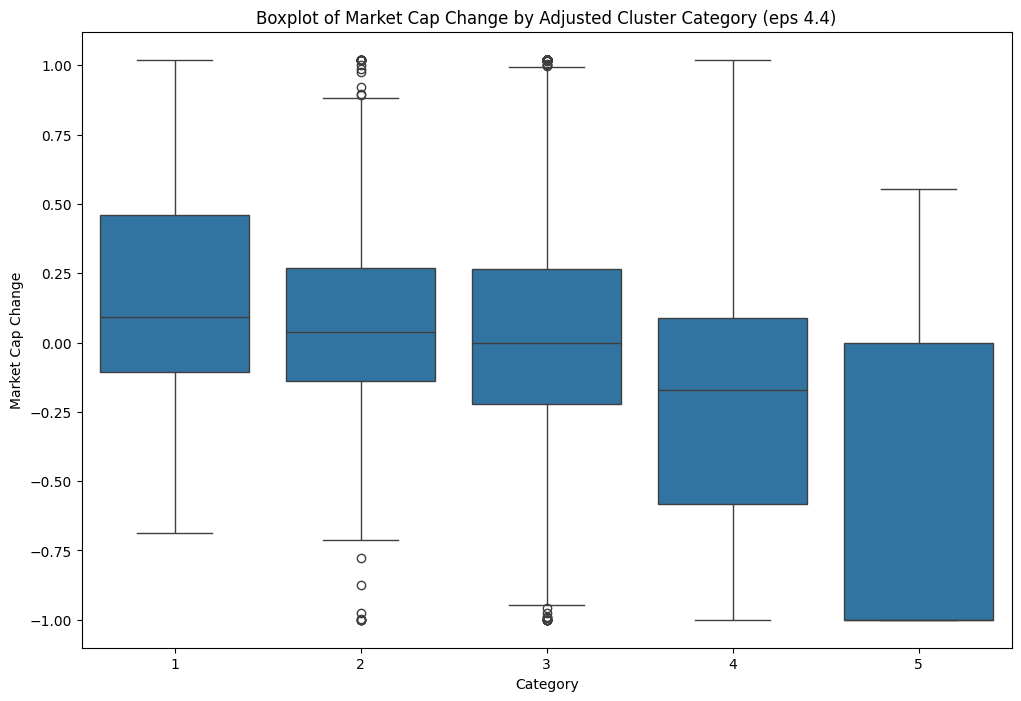

In [825]:
if 'Category' in final_merged_df.columns:
    final_merged_df.drop('Category', axis=1, inplace=True)

# Merge the new 'Category' column back into 'final_merged_df'
final_merged_df = final_merged_df.merge(cluster_stats[['Category']], left_on='cluster', right_index=True, how='left')

# Re-create the boxplot with the updated categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='market cap change', data=final_merged_df)
plt.title('Boxplot of Market Cap Change by Adjusted Cluster Category (eps 4.4)')
plt.xlabel('Category')
plt.ylabel('Market Cap Change')
plt.show()

In [826]:
final_merged_df2['Category'].value_counts()

Category
3    2553
4     864
2     588
1     338
5     148
Name: count, dtype: int64